### IMPORTING LIBRARIES AND DATA FILE:

In [1]:
# Importing all the required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import imblearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

In [120]:
# Importing 'telecom_churn_data'
df = pd.read_csv("telecom_churn_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [121]:
# Checking df
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### SEGREGATING HIGH VALUE CUSTOMERS:

In [69]:
# Deriving new features
df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [70]:
df['amt_6'] = df[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
df['amt_7'] = df[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

In [71]:
df['avg_amt_6_7'] = df[['amt_6','amt_7']].mean(axis=1)

In [72]:
df=df.drop(['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6', 'av_rech_amt_data_7'],axis=1)

In [73]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...   aon  aug_vbc_3g  jul_vbc_3g  \
0            9/30/2014  197.385  ...   968        30.4         0.0   
1            9/30/2014   34.047  ...  1006         0.0         0.0   
2            9/30/2014  167.690  ...  1103         0.0         0.0   
3            9/30/2014  221.338  ...  2491         0.0         0.0   
4            9/30/2014  261.636  ...  1526         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  total_data_rech_6  total_data_rech_7  amt_6  amt_7  \
0      101.20        3.58              252.0              252.0  614.0  504.0   
1        0.00        0.00                NaN              154.0   74.0  538.0   
2        4.17        0.00                NaN                NaN  168.0  315.0   
3        0.00        0.00                NaN                NaN  230.0  310.0   
4        0.00        0.00               56.0                NaN  252.0  350.0   

   avg_amt_6_7  
0        559.0  
1        306.0  
2        241.5  
3        270.0  
4        301.0  

[5 rows x 227 columns]

#### For high value customer recharge amount should be greater than 70 percentile:

In [74]:
df1 = df[(df['avg_amt_6_7']> df['avg_amt_6_7'].quantile(0.7))]

In [75]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 227 entries, mobile_number to avg_amt_6_7
dtypes: float64(180), int64(35), object(12)
memory usage: 52.1+ MB


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6  ...  aon  aug_vbc_3g  jul_vbc_3g  \
0             9/30/2014   197.385  ...  968       30.40        0.00   
7             9/30/2014  1069.180  ...  802       57.74       19.38   
8             9/30/2014   378.721  ...  315       21.03      910.65   
21            9/30/2014   514.453  ...  720        0.00        0.00   
23            9/30/2014    74.350  ...  604       40.45       51.86   

    jun_vbc_3g  sep_vbc_3g  total_data_rech_6  total_data_rech_7   amt_6  \
0       101.20        3.58              252.0              252.0   614.0   
7        18.74        0.00                NaN                NaN  1580.0   
8       122.16        0.00                NaN              354.0   437.0   
21        0.00        0.00                NaN                NaN   600.0   
23        0.00        0.00                NaN              712.0     0.0   

     amt_7  avg_amt_6_7  
0    504.0        559.0  
7    790.0       1185.0  
8    955.0        696.0  
21   680.0        640.0  
23  1166.0        583.0  

[5 rows x 227 columns]

In [76]:
df1.shape

(29953, 227)

#### Problem statement mentions that after filtering the high-value customers, we should be left with about 29.9k rows.

In [77]:
# Deleting columns having only 1 unique value
df1= df1.loc[:,df.nunique()!=1]
df1.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  aon  aug_vbc_3g  \
0           NaN         0.00          NaN           NaN  ...  968       30.40   
7         54.68        52.29          NaN        453.43  ...  802       57.74   
8        351.03        35.08        33.46         94.66  ...  315       21.03   
21       132.11        85.14       161.63        757.93  ...  720        0.00   
23        50.66        33.58        15.74         85.41  ...  604       40.45   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_6  total_data_rech_7  \
0         0.00      101.20        3.58              252.0              252.0   
7        19.38       18.74        0.00                NaN                NaN   
8       910.65      122.16        0.00                NaN              354.0   
21        0.00        0.00        0.00                NaN                NaN   
23       51.86        0.00        0.00                NaN              712.0   

     amt_6   amt_7  avg_amt_6_7  
0    614.0   504.0        559.0  
7   1580.0   790.0       1185.0  
8    437.0   955.0        696.0  
21   600.0   680.0        640.0  
23     0.0  1166.0        583.0  

[5 rows x 211 columns]

In [78]:
df1.shape

(29953, 211)

In [79]:
# Dropping Duplicates
df1.drop_duplicates(keep='first',inplace=True)
df1.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...  aon  aug_vbc_3g  \
0           NaN         0.00          NaN           NaN  ...  968       30.40   
7         54.68        52.29          NaN        453.43  ...  802       57.74   
8        351.03        35.08        33.46         94.66  ...  315       21.03   
21       132.11        85.14       161.63        757.93  ...  720        0.00   
23        50.66        33.58        15.74         85.41  ...  604       40.45   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_6  total_data_rech_7  \
0         0.00      101.20        3.58              252.0              252.0   
7        19.38       18.74        0.00                NaN                NaN   
8       910.65      122.16        0.00                NaN              354.0   
21        0.00        0.00        0.00                NaN                NaN   
23       51.86        0.00        0.00                NaN              712.0   

     amt_6   amt_7  avg_amt_6_7  
0    614.0   504.0        559.0  
7   1580.0   790.0       1185.0  
8    437.0   955.0        696.0  
21   600.0   680.0        640.0  
23     0.0  1166.0        583.0  

[5 rows x 211 columns]

In [ ]:
# Dropping 'mobile_number' from df since it won't be adding any value during model building 
df=df.drop(['mobile_number'],axis=1)

In [80]:
# Replacing the month names with respective month numbers: 
# jun:6, jul:7, aug:8, sep:9
df1.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [81]:
#Defining Churn col values
df1['churn'] = np.where(((df1['total_ic_mou_9'] == 0.00) | (df1['total_og_mou_9'] == 0.00))
                            & ((df1['vol_2g_mb_9'] == 0.00) | (df1['vol_3g_mb_9'] == 0.00))
                            , 1, 0   )

In [82]:
# Non Churned Customers
len(df1[df1['churn']==0])

26698

In [83]:
# Churned Customers
len(df1[df1['churn']==1])

3255

In [84]:
# Deleting all cols having '_9' in their name
cols = [col for col in df1.columns if '_9' in col]
print(cols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


In [85]:
# Dropping these colmumns
df1.drop(cols, axis=1, inplace=True)

In [86]:
df1.shape

(29953, 160)

In [87]:
# Checking the null value in each columns
pd.set_option('display.max_rows', 200)
round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False)

arpu_2g_8                   46.80
date_of_last_rech_data_8    46.80
total_rech_data_8           46.80
arpu_3g_8                   46.80
av_rech_amt_data_8          46.80
max_rech_data_8             46.80
fb_user_8                   46.80
count_rech_3g_8             46.80
night_pck_user_8            46.80
count_rech_2g_8             46.80
arpu_3g_6                   44.11
count_rech_3g_6             44.11
night_pck_user_6            44.11
arpu_2g_6                   44.11
fb_user_6                   44.11
count_rech_2g_6             44.11
max_rech_data_6             44.11
total_data_rech_6           44.11
date_of_last_rech_data_6    44.11
count_rech_3g_7             43.12
max_rech_data_7             43.12
arpu_3g_7                   43.12
arpu_2g_7                   43.12
date_of_last_rech_data_7    43.12
night_pck_user_7            43.12
count_rech_2g_7             43.12
fb_user_7                   43.12
total_data_rech_7           43.12
loc_ic_t2f_mou_8             3.91
onnet_mou_8   

In [88]:
# We will drop the columns having more than 40% NA values.
df1 = df1.drop(df1.loc[:,list(round(100*(df1.isnull().sum()/len(df1.index)), 2)>40)].columns, 1)

In [89]:
# Replacing NaN with 0
df1.loc[:,:] = df1.loc[:,:].replace(np.NaN,0)

In [90]:
df1.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  sachet_3g_7  \
0          0.00          0.00          0.00          0.00  ...            0   
7         52.29        453.43        567.16        325.91  ...            0   
8         35.08         94.66         80.63        136.48  ...            0   
21        85.14        757.93        896.68        983.39  ...            0   
23        33.58         85.41         89.36        205.89  ...            0   

    sachet_3g_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6   amt_6   amt_7  \
0             0  968     30.40      0.00    101.20   614.0   504.0   
7             0  802     57.74     19.38     18.74  1580.0   790.0   
8             0  315     21.03    910.65    122.16   437.0   955.0   
21            0  720      0.00      0.00      0.00   600.0   680.0   
23            1  604     40.45     51.86      0.00     0.0  1166.0   

    avg_amt_6_7  churn  
0         559.0      1  
7        1185.0      1  
8         696.0      0  
21        640.0      0  
23        583.0      0  

[5 rows x 132 columns]

In [91]:
# Checking the null value in each columns
round(100*(df1.isnull().sum()/len(df1.index)),2).sort_values(ascending=False)

churn                  0.0
spl_og_mou_8           0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
std_og_t2f_mou_7       0.0
std_og_t2f_mou_8       0.0
std_og_mou_6           0.0
std_og_mou_7           0.0
std_og_mou_8           0.0
isd_og_mou_6           0.0
isd_og_mou_7           0.0
isd_og_mou_8           0.0
spl_og_mou_6           0.0
spl_og_mou_7           0.0
og_others_6            0.0
avg_amt_6_7            0.0
og_others_7            0.0
og_others_8            0.0
total_og_mou_6         0.0
total_og_mou_7         0.0
total_og_mou_8         0.0
loc_ic_t2t_mou_6       0.0
loc_ic_t2t_mou_7       0.0
loc_ic_t2t_mou_8       0.0
loc_ic_t2m_mou_6       0.0
loc_ic_t2m_mou_7       0.0
loc_ic_t2m_mou_8       0.0
loc_ic_t2f_mou_6       0.0
loc_ic_t2f_mou_7       0.0
loc_ic_t2f_mou_8       0.0
std_og_t2t_mou_8       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_6       0.0
loc_og_mou_8           0.0
arpu_6                 0.0
a

### EXPLORATORY DATA ANALYSIS:

In [27]:
df1['churn'].value_counts()

0    26698
1     3255
Name: churn, dtype: int64

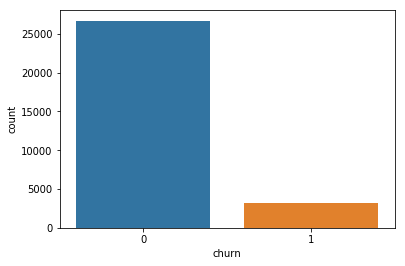

In [28]:
sns.countplot(x='churn', data=df1)

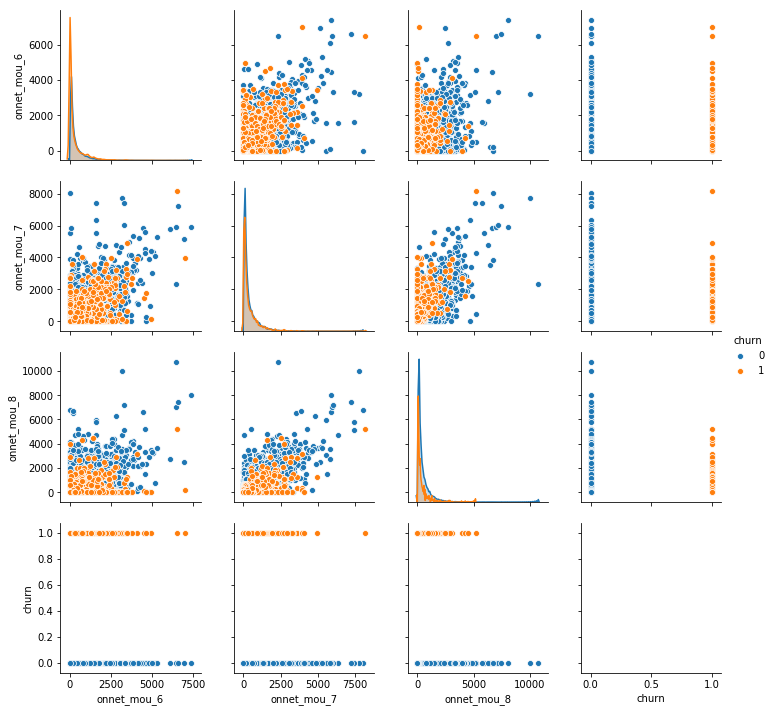

In [29]:
# All kind of calls within the same operator network (Minutes of usage - voice calls)
sns.pairplot(data=df1[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

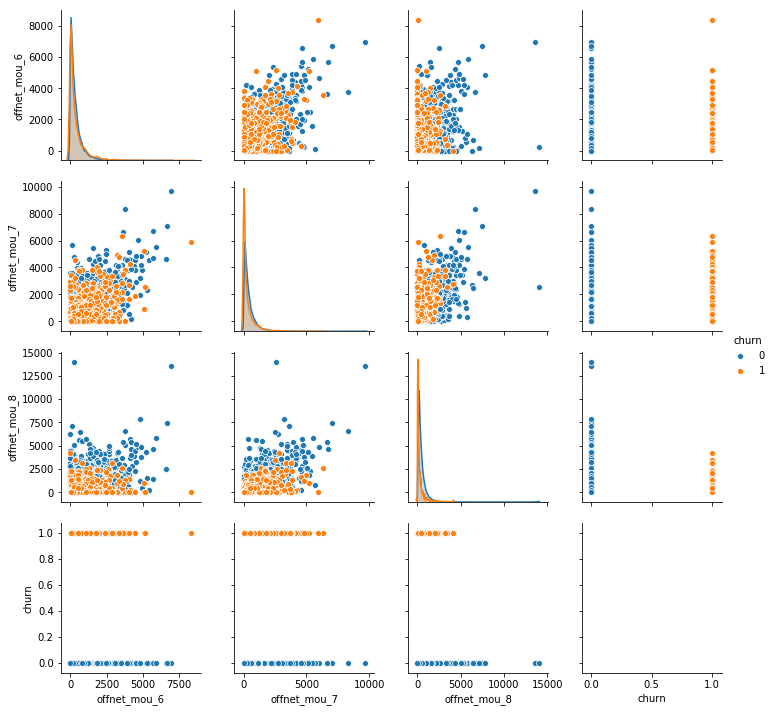

In [30]:
# All kind of calls outside the operator T network (Minutes of usage - voice calls)
sns.pairplot(data=df1[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

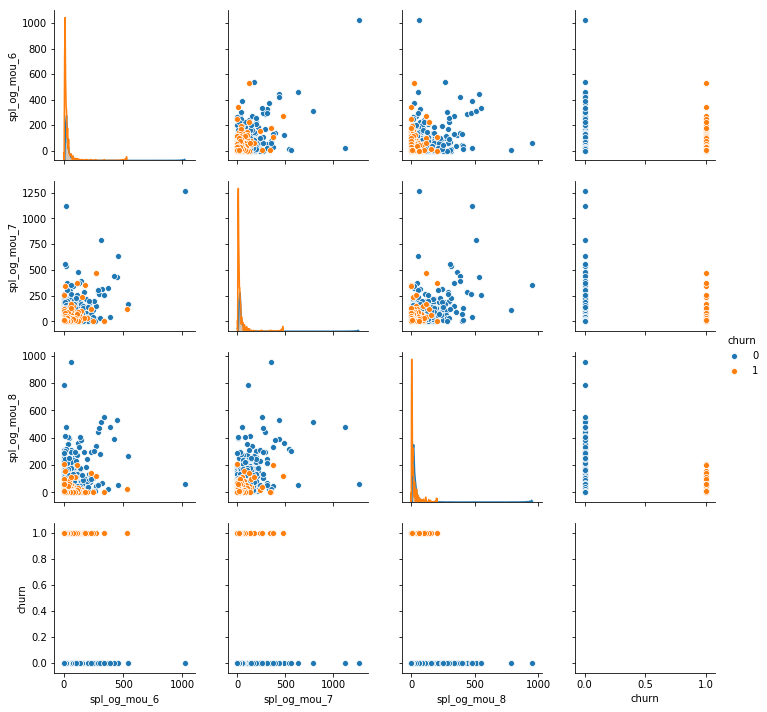

In [31]:
# Special Outgoing calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','churn']],hue='churn')

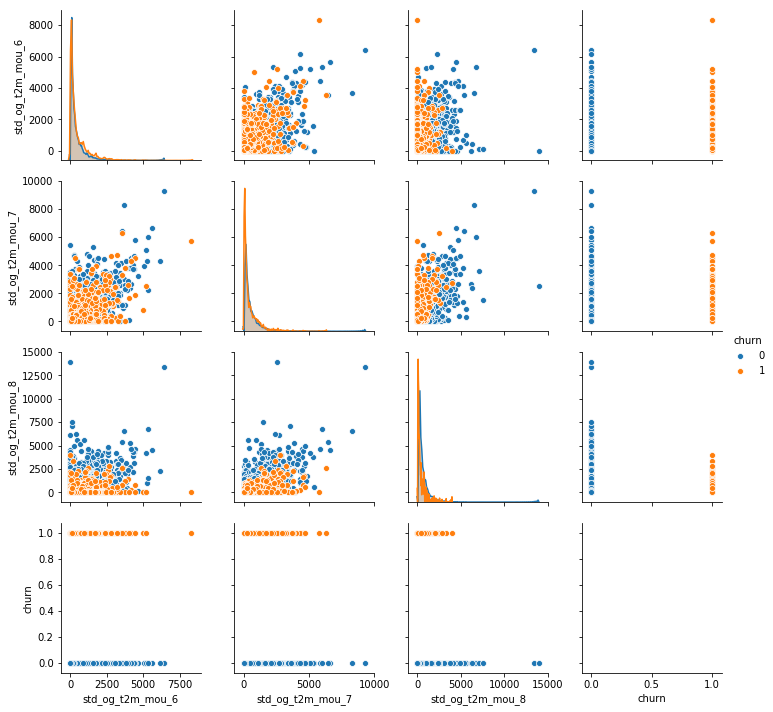

In [32]:
# STD calls - outside the calling circle, Outgoing calls, Operator T to other operator mobile (Minutes of usage - voice calls)
sns.pairplot(data=df1[['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','churn']],hue='churn')

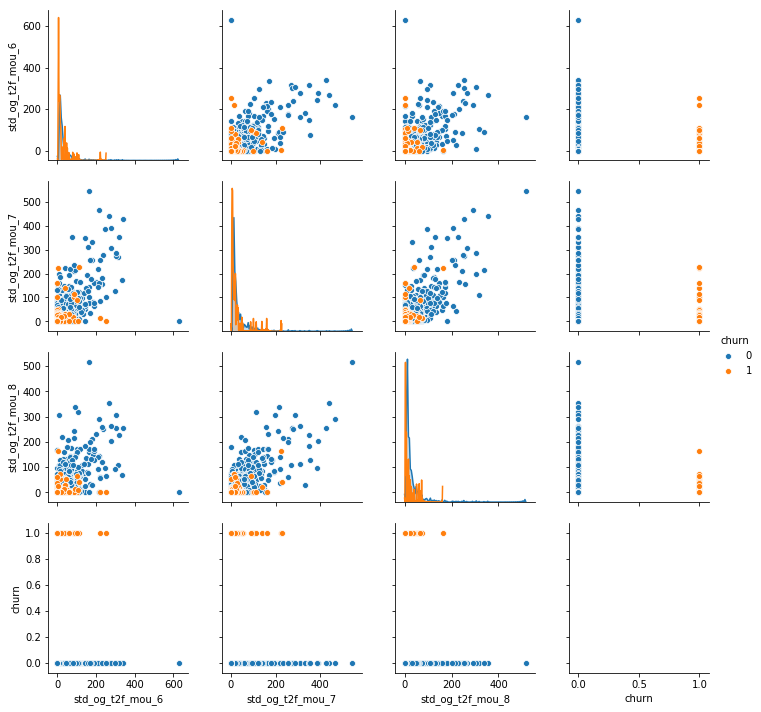

In [33]:
# STD calls - outside the calling circle, Outgoing calls, Operator T to fixed lines of T (Minutes of usage - voice calls)
sns.pairplot(data=df1[['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','churn']],hue='churn')

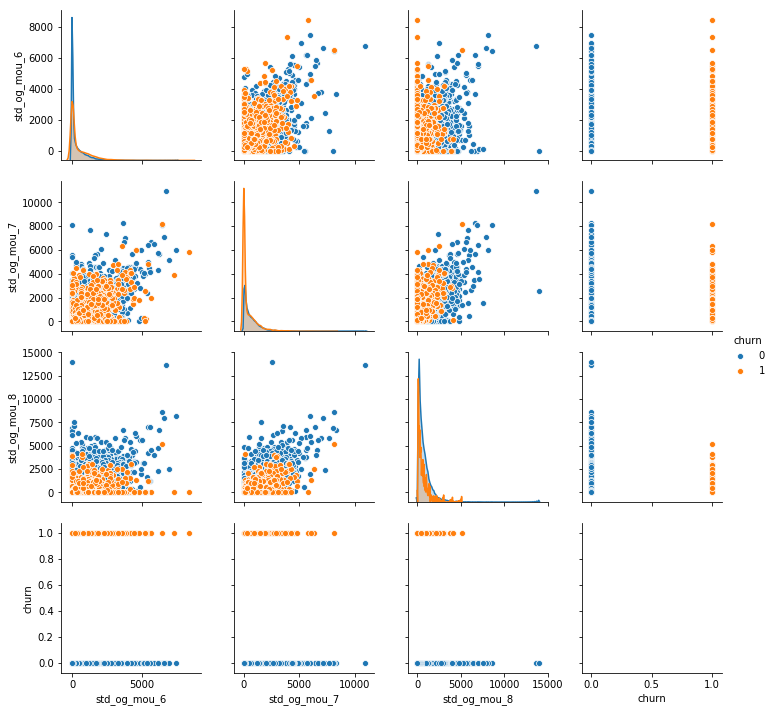

In [34]:
# STD calls - outside the calling circle, Outgoing calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

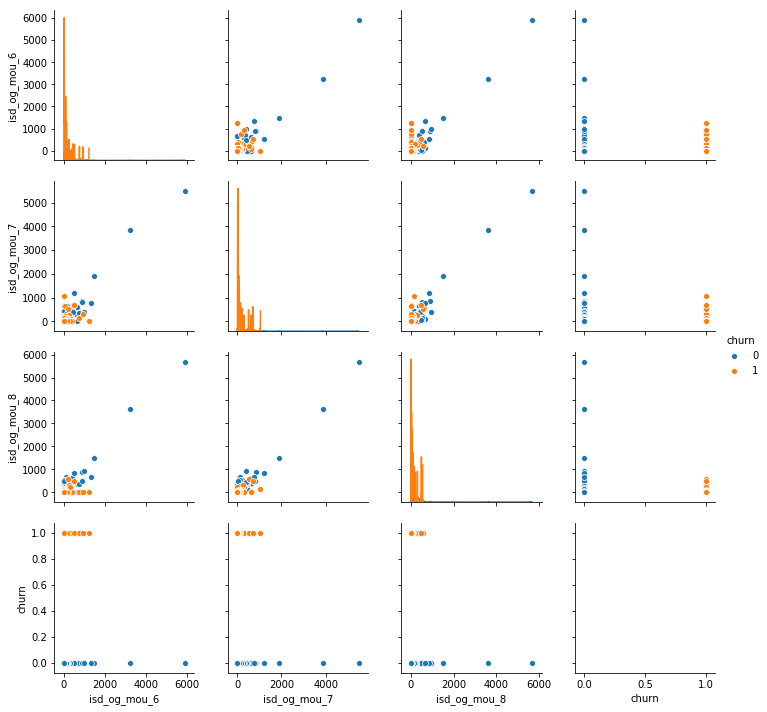

In [35]:
# ISD calls, Outgoing calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

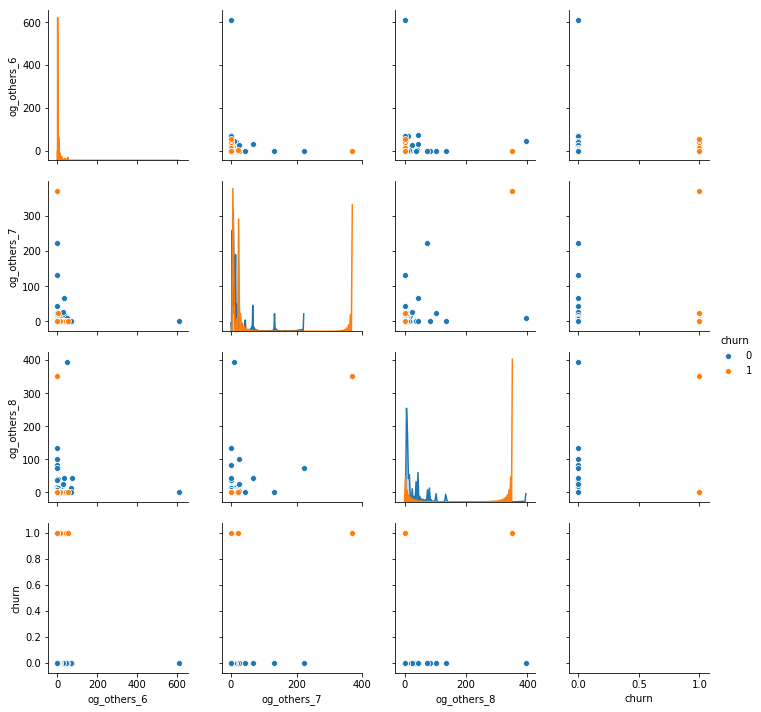

In [36]:
# Outgoing calls, Others
sns.pairplot(data=df1[['og_others_6','og_others_7','og_others_8','churn']],hue='churn')

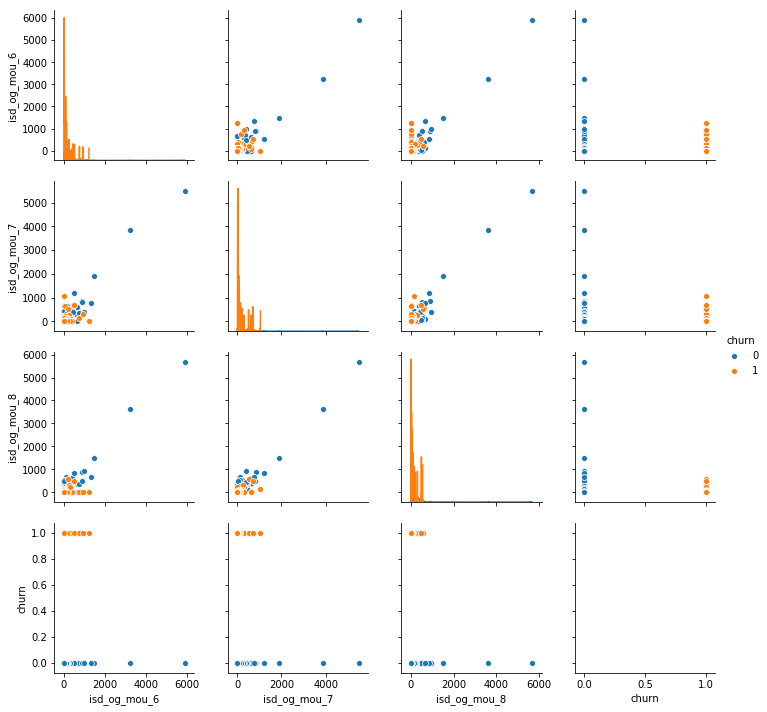

In [37]:
# ISD calls, Outgoing calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

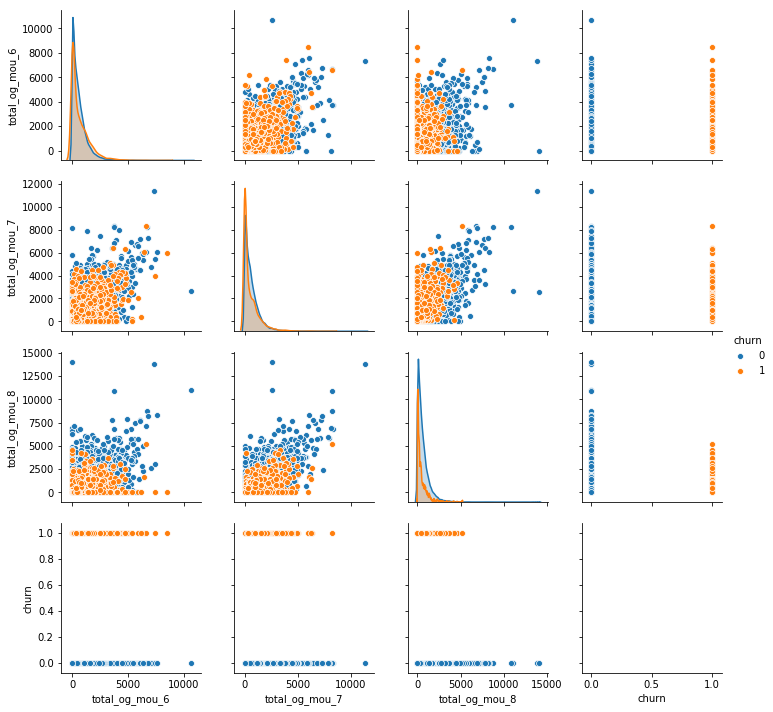

In [38]:
# Total Outgoing calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

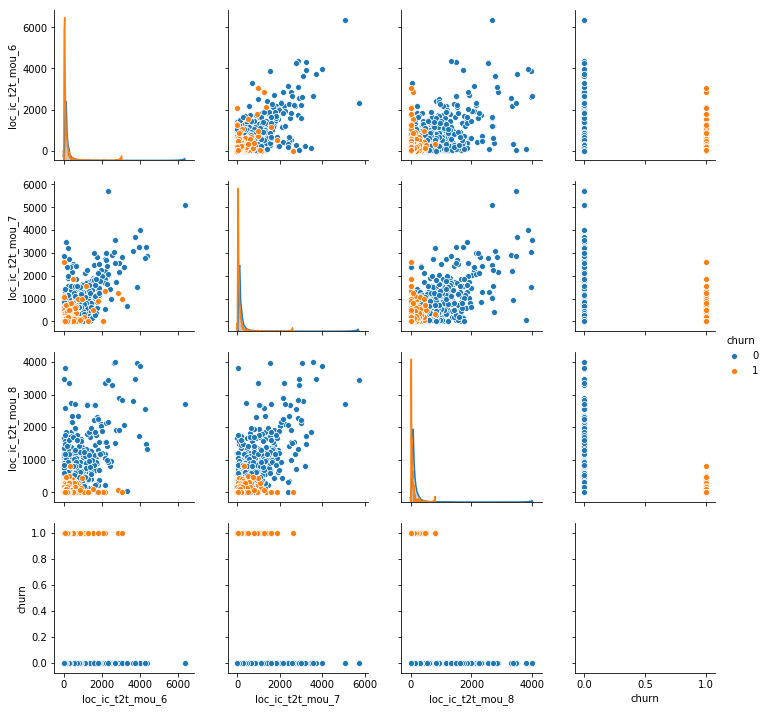

In [39]:
# Local calls - within same telecom circle, Incoming calls, Operator T to T, i.e. within same operator (mobile to mobile)
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','churn']],hue='churn')

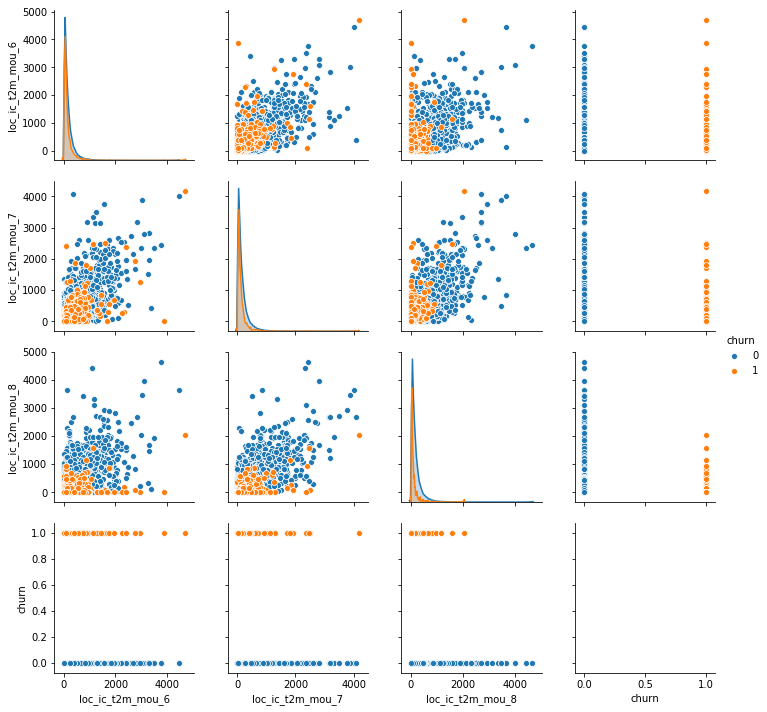

In [40]:
# Local calls - within same telecom circle, Incoming calls, Operator T to other operator mobile 
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','churn']],hue='churn')

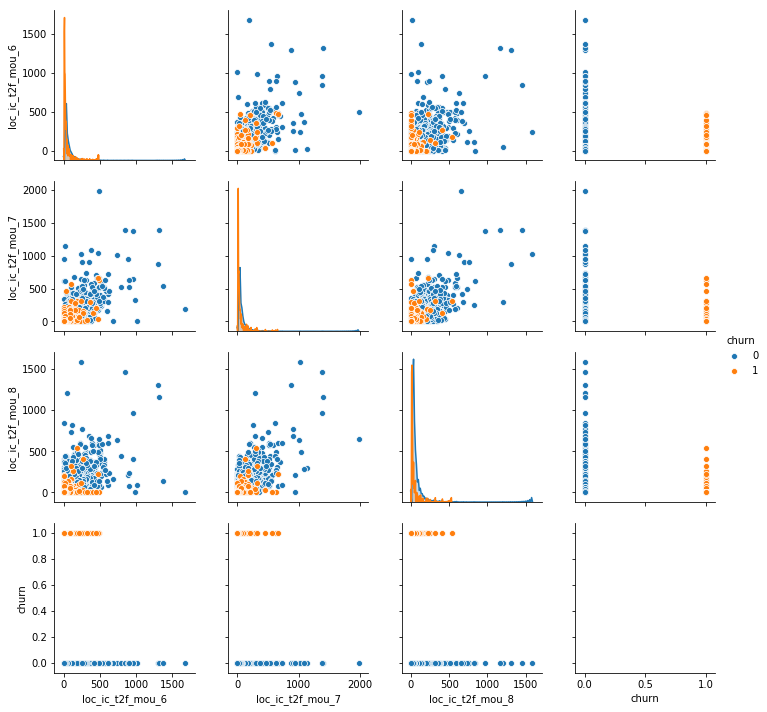

In [41]:
# Local calls - within same telecom circle, Incoming calls, Operator T to fixed lines of T 
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','churn']],hue='churn')

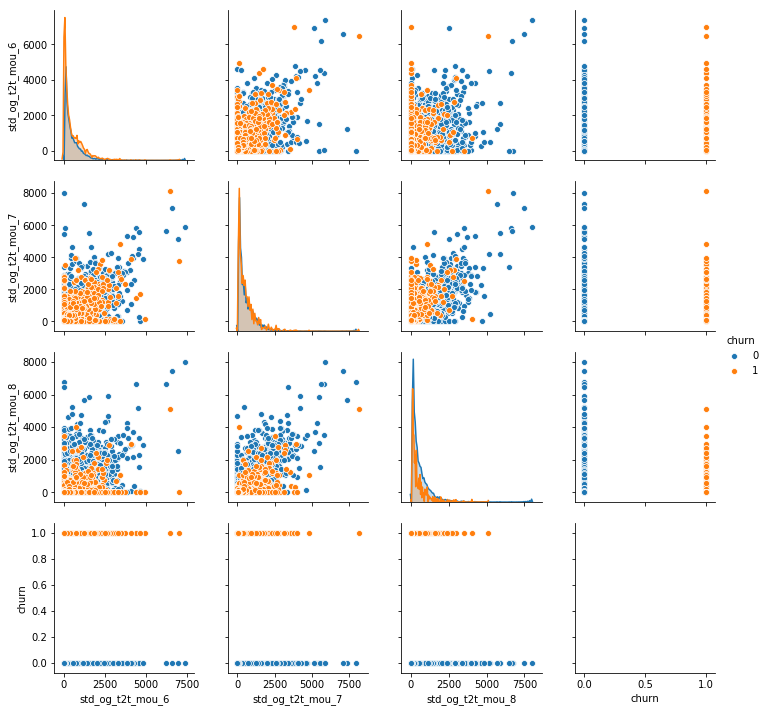

In [42]:
# STD calls - within same telecom circle, Outgoing calls, Operator T to T, i.e. within same operator (mobile to mobile)
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','churn']],hue='churn')

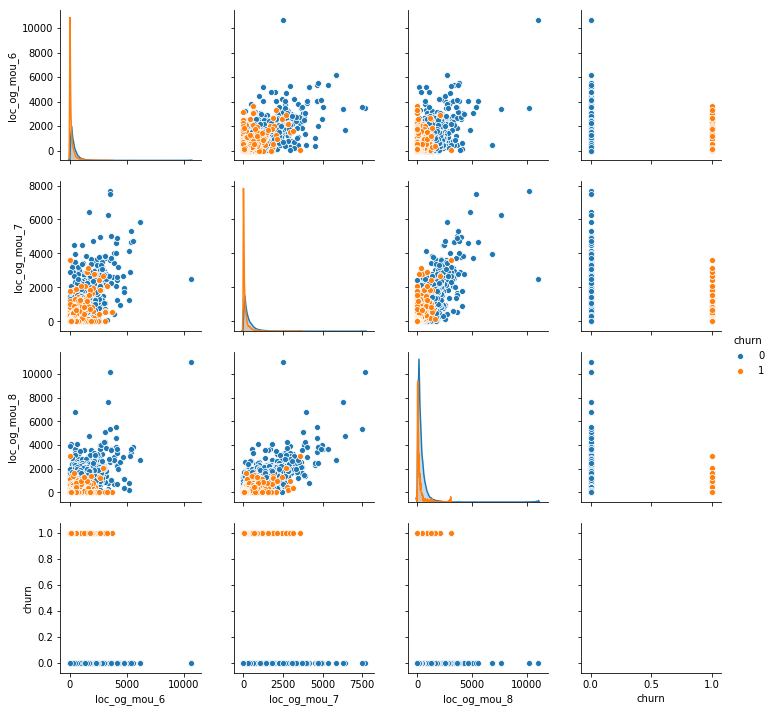

In [43]:
# Local calls - within same telecom circle, outgoing calls, (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

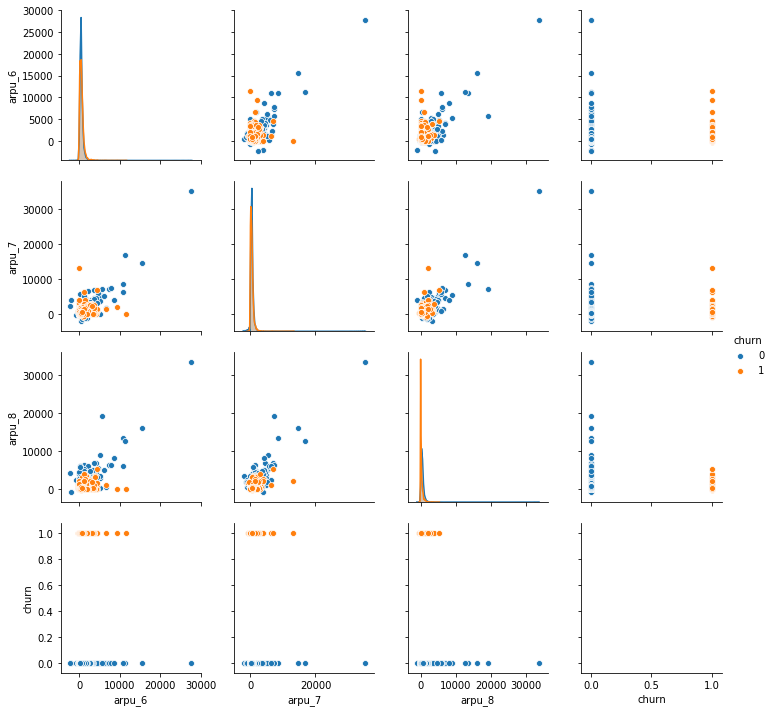

In [44]:
# Average revenue per user
sns.pairplot(data=df1[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

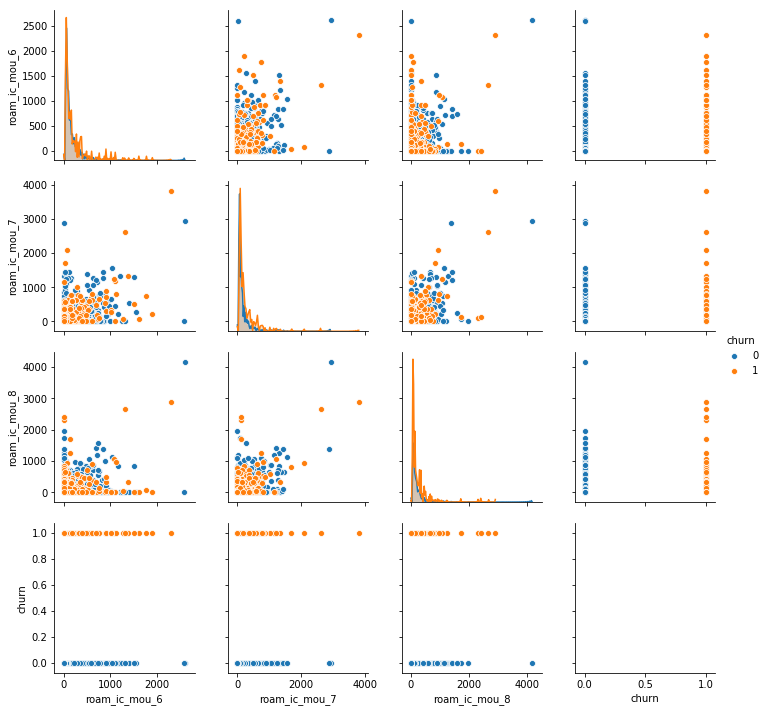

In [45]:
# Indicates that customer is in roaming zone during the call, Incoming calls, (Minutes of usage - voice calls)
sns.pairplot(data=df1[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

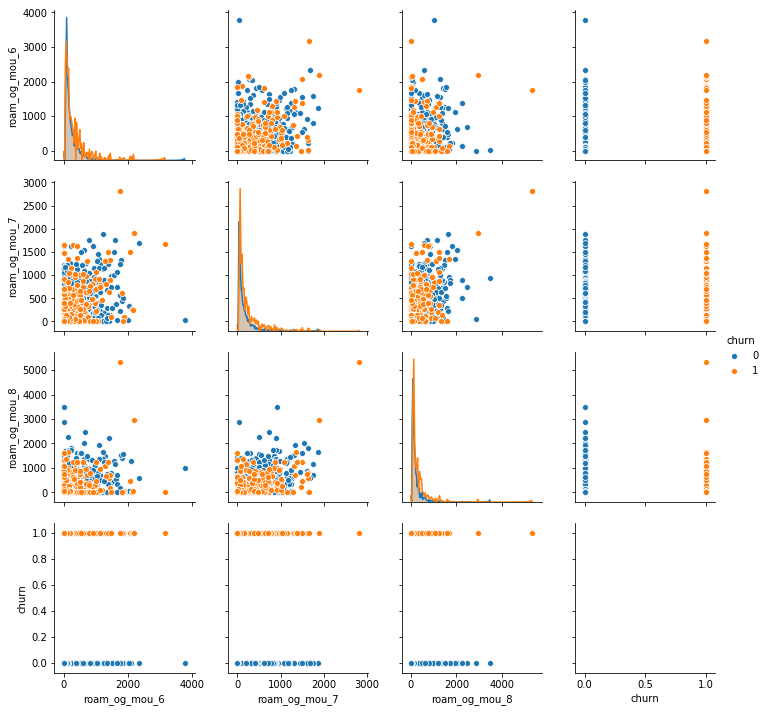

In [46]:
# Indicates that customer is in roaming zone during the call, Outgoing calls, (Minutes of usage - voice calls)
sns.pairplot(data=df1[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']],hue='churn')

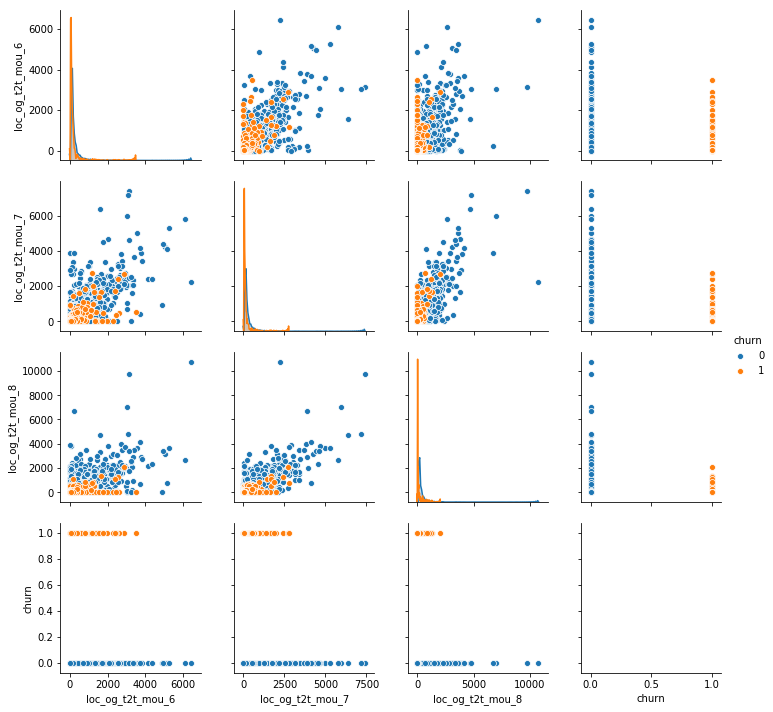

In [47]:
# Indicates that customer is in roaming zone during the call, Outgoing calls, (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','churn']],hue='churn')

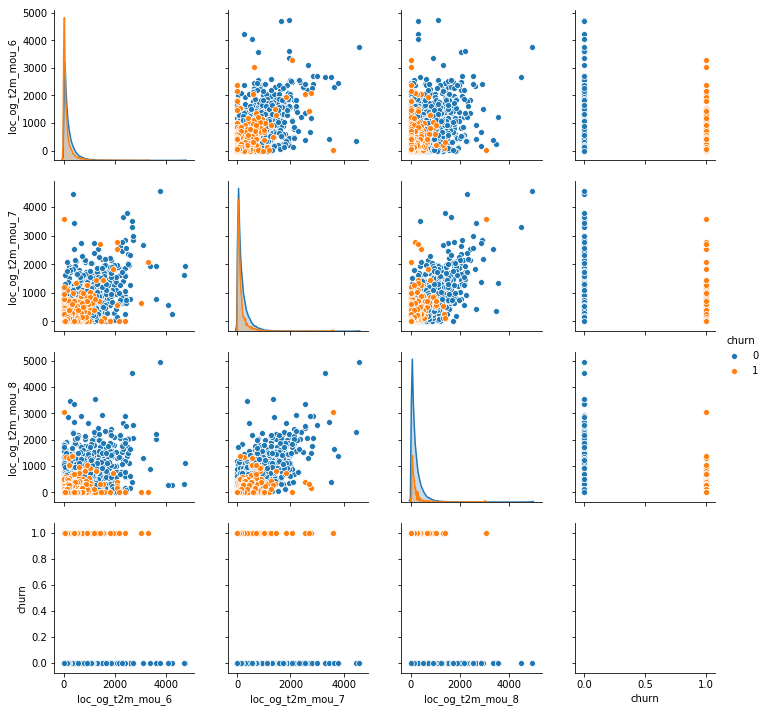

In [48]:
# Indicates that customer Local calls - within same telecom circle, Outgoing calls, Operator T to other operator mobile
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','churn']],hue='churn')

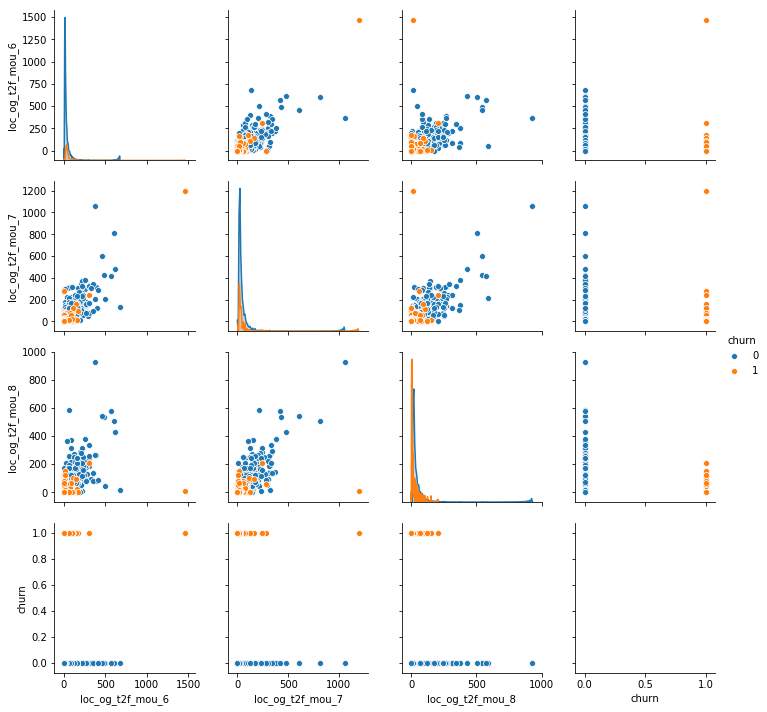

In [49]:
# Indicates that customer Local calls - within same telecom circle, Outgoing calls, Operator T to fixed lines of T
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','churn']],hue='churn')

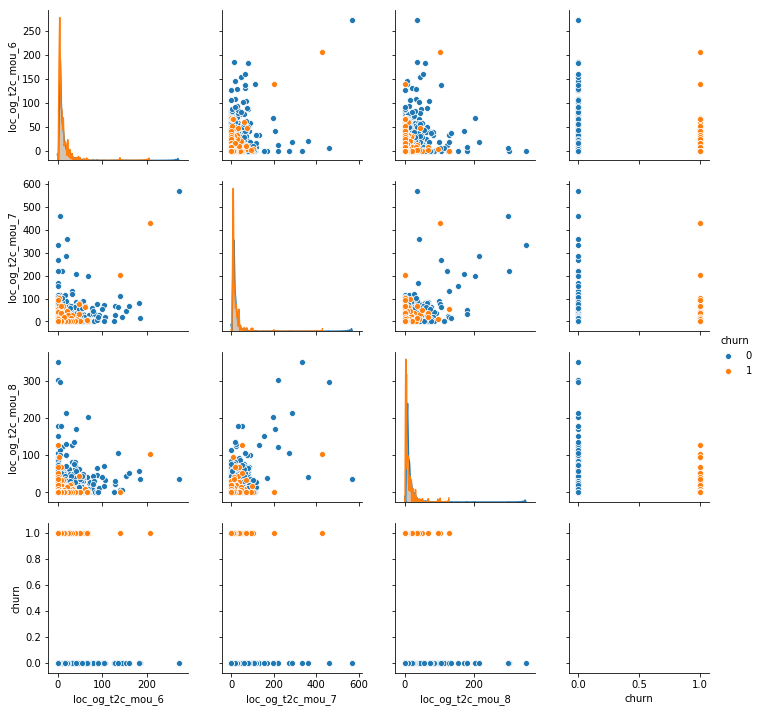

In [50]:
# Indicates that customer Local calls - within same telecom circle, Outgoing calls, Operator T to it’s own call center
# (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','churn']],hue='churn')

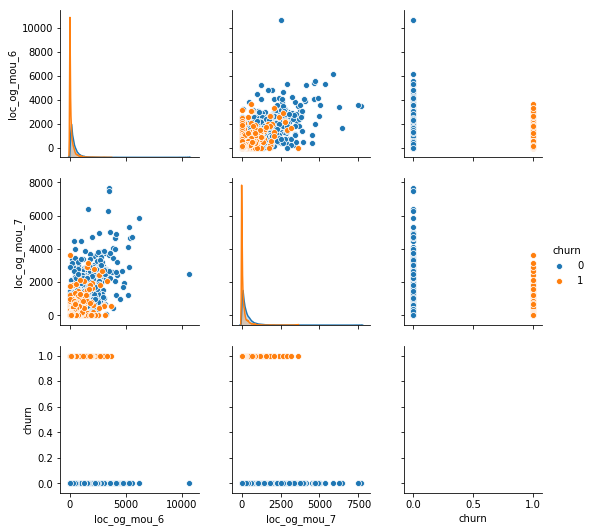

In [51]:
# Indicates that customer Local calls - within same telecom circle, Outgoing calls, (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_og_mou_6','loc_og_mou_7','churn']],hue='churn')

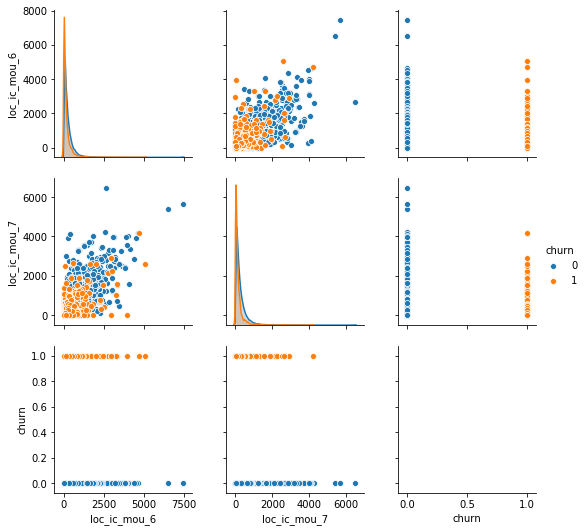

In [52]:
# Indicates that customer Local calls - within same telecom circle, incoming calls (Minutes of usage - voice calls)
sns.pairplot(data=df1[['loc_ic_mou_6','loc_ic_mou_7','churn']],hue='churn')

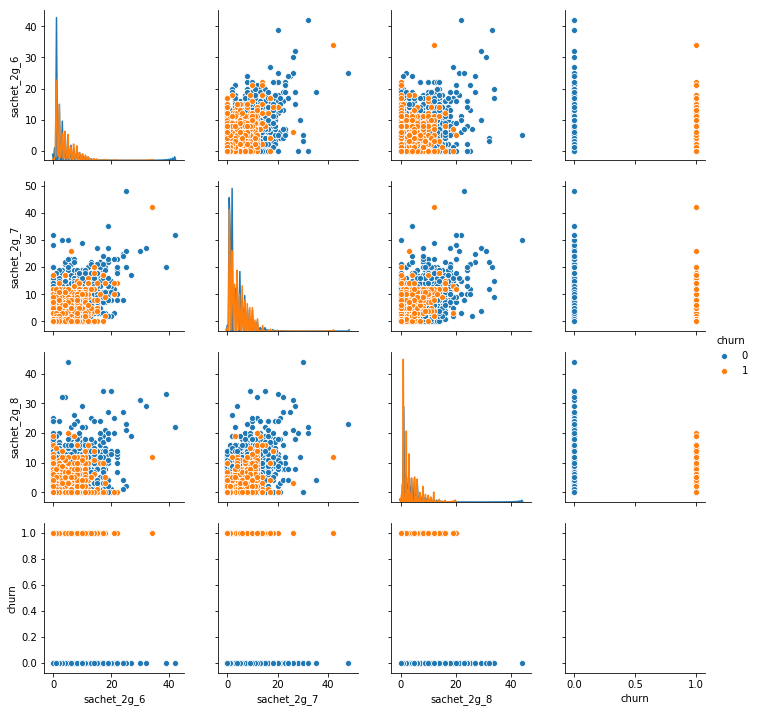

In [53]:
# Service schemes with validity smaller than a month, 2G network
sns.pairplot(data=df1[['sachet_2g_6','sachet_2g_7','sachet_2g_8','churn']],hue='churn')

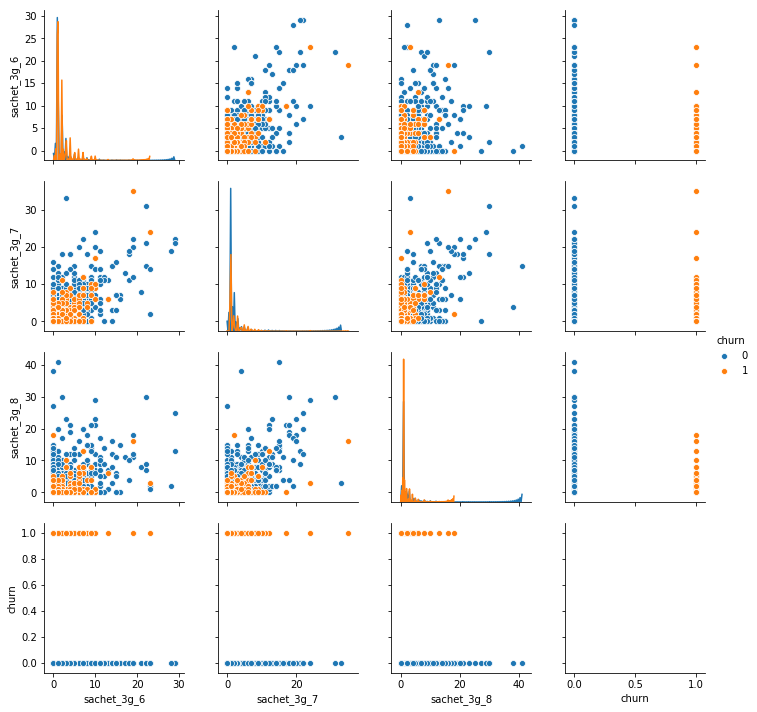

In [54]:
# Service schemes with validity smaller than a month, 3G network
sns.pairplot(data=df1[['sachet_3g_6','sachet_3g_7','sachet_3g_8','churn']],hue='churn')

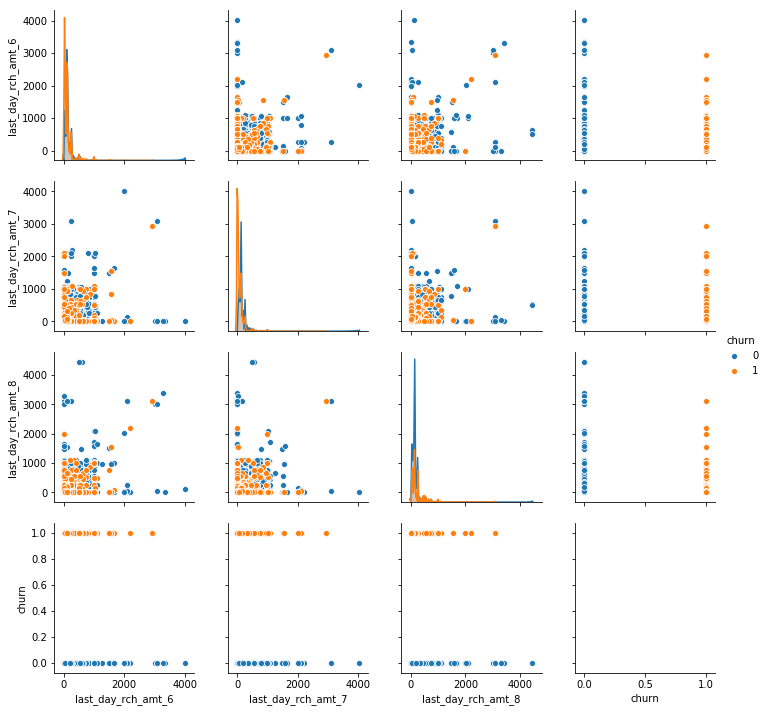

In [55]:
# Last day Recharge amount
sns.pairplot(data=df1[['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','churn']],hue='churn')

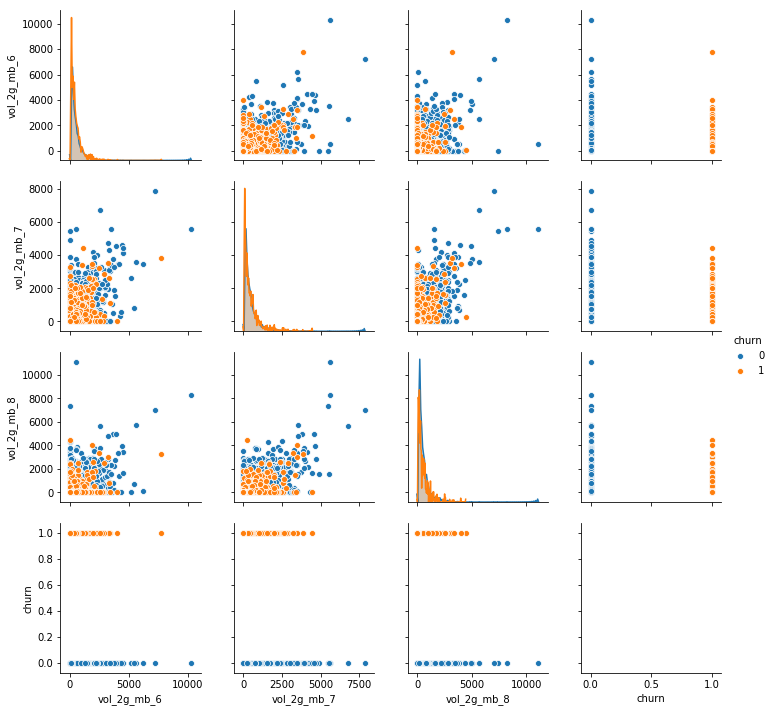

In [56]:
# Mobile internet usage volume (in MB) for 2G Network
sns.pairplot(data=df1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

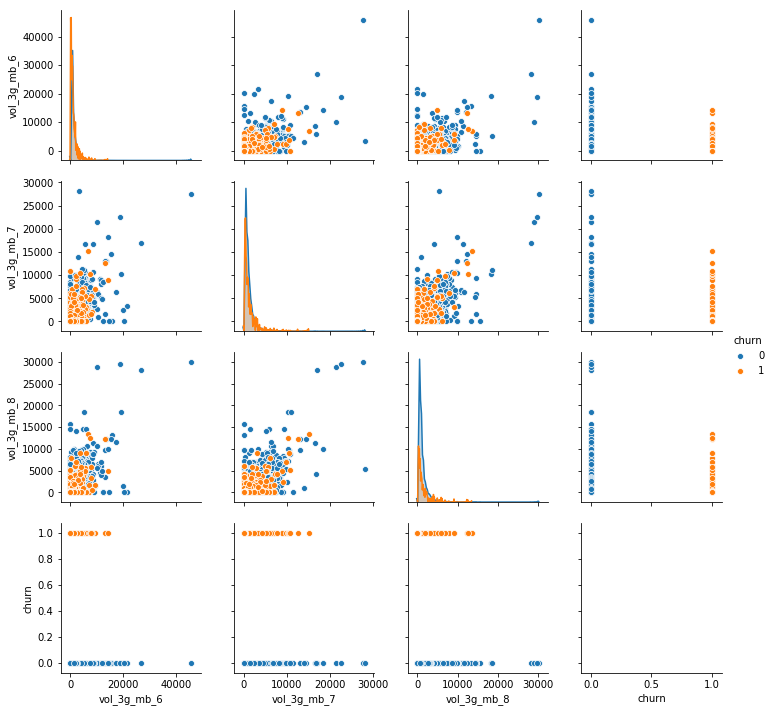

In [57]:
# Mobile internet usage volume (in MB) for 3G Network
sns.pairplot(data=df1[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

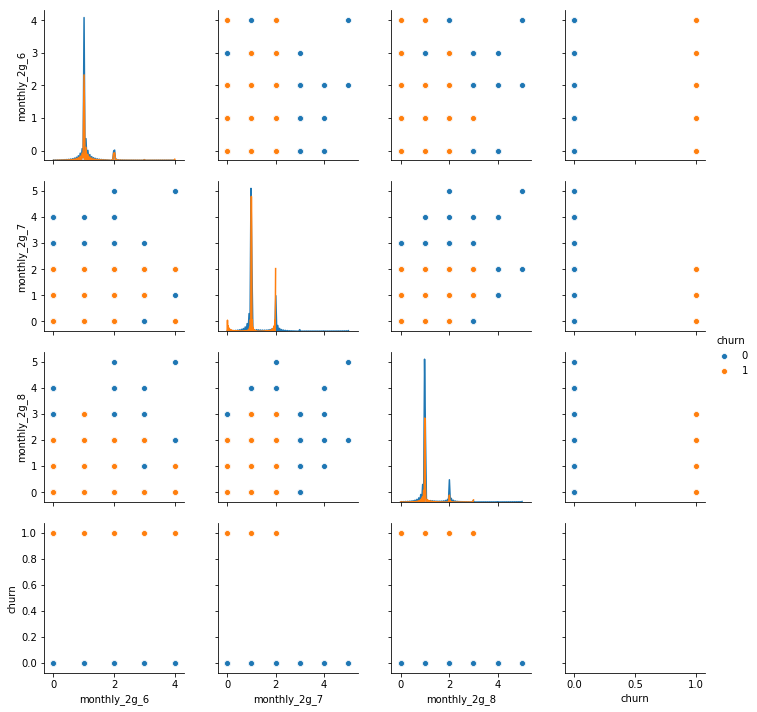

In [58]:
# Service schemes with validity equivalent to a month, 2G Network
sns.pairplot(data=df1[['monthly_2g_6','monthly_2g_7','monthly_2g_8','churn']],hue='churn')

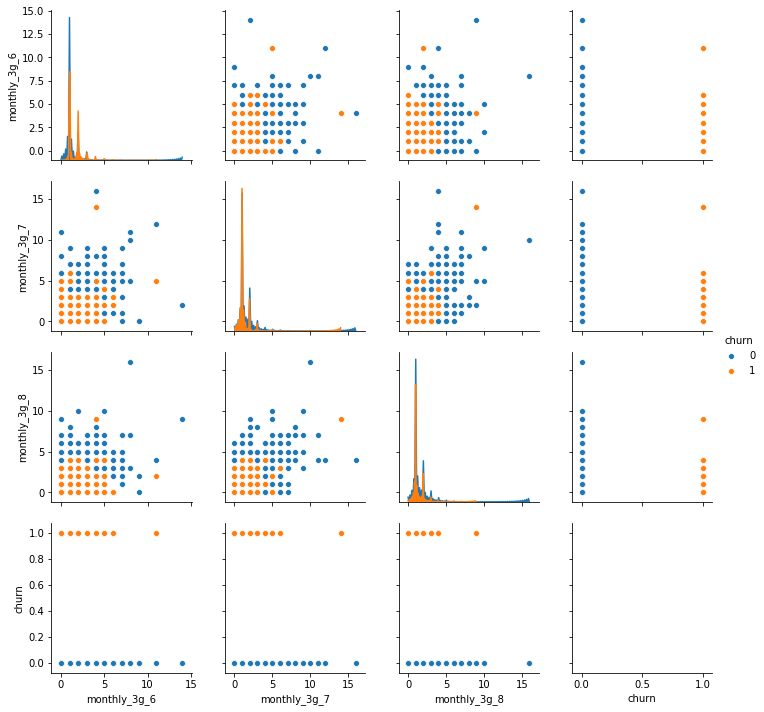

In [59]:
# Service schemes with validity equivalent to a month, 3G Network
sns.pairplot(data=df1[['monthly_3g_6','monthly_3g_7','monthly_3g_8','churn']],hue='churn')

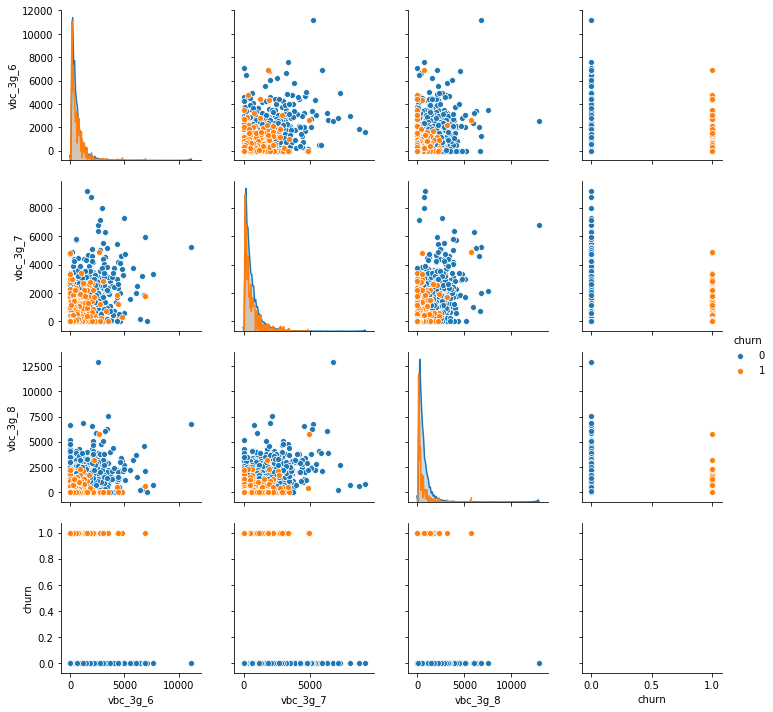

In [60]:
# Volume based cost - when no specific scheme is not purchased and paid as per usage               
sns.pairplot(data=df1[['vbc_3g_6','vbc_3g_7','vbc_3g_8','churn']],hue='churn')

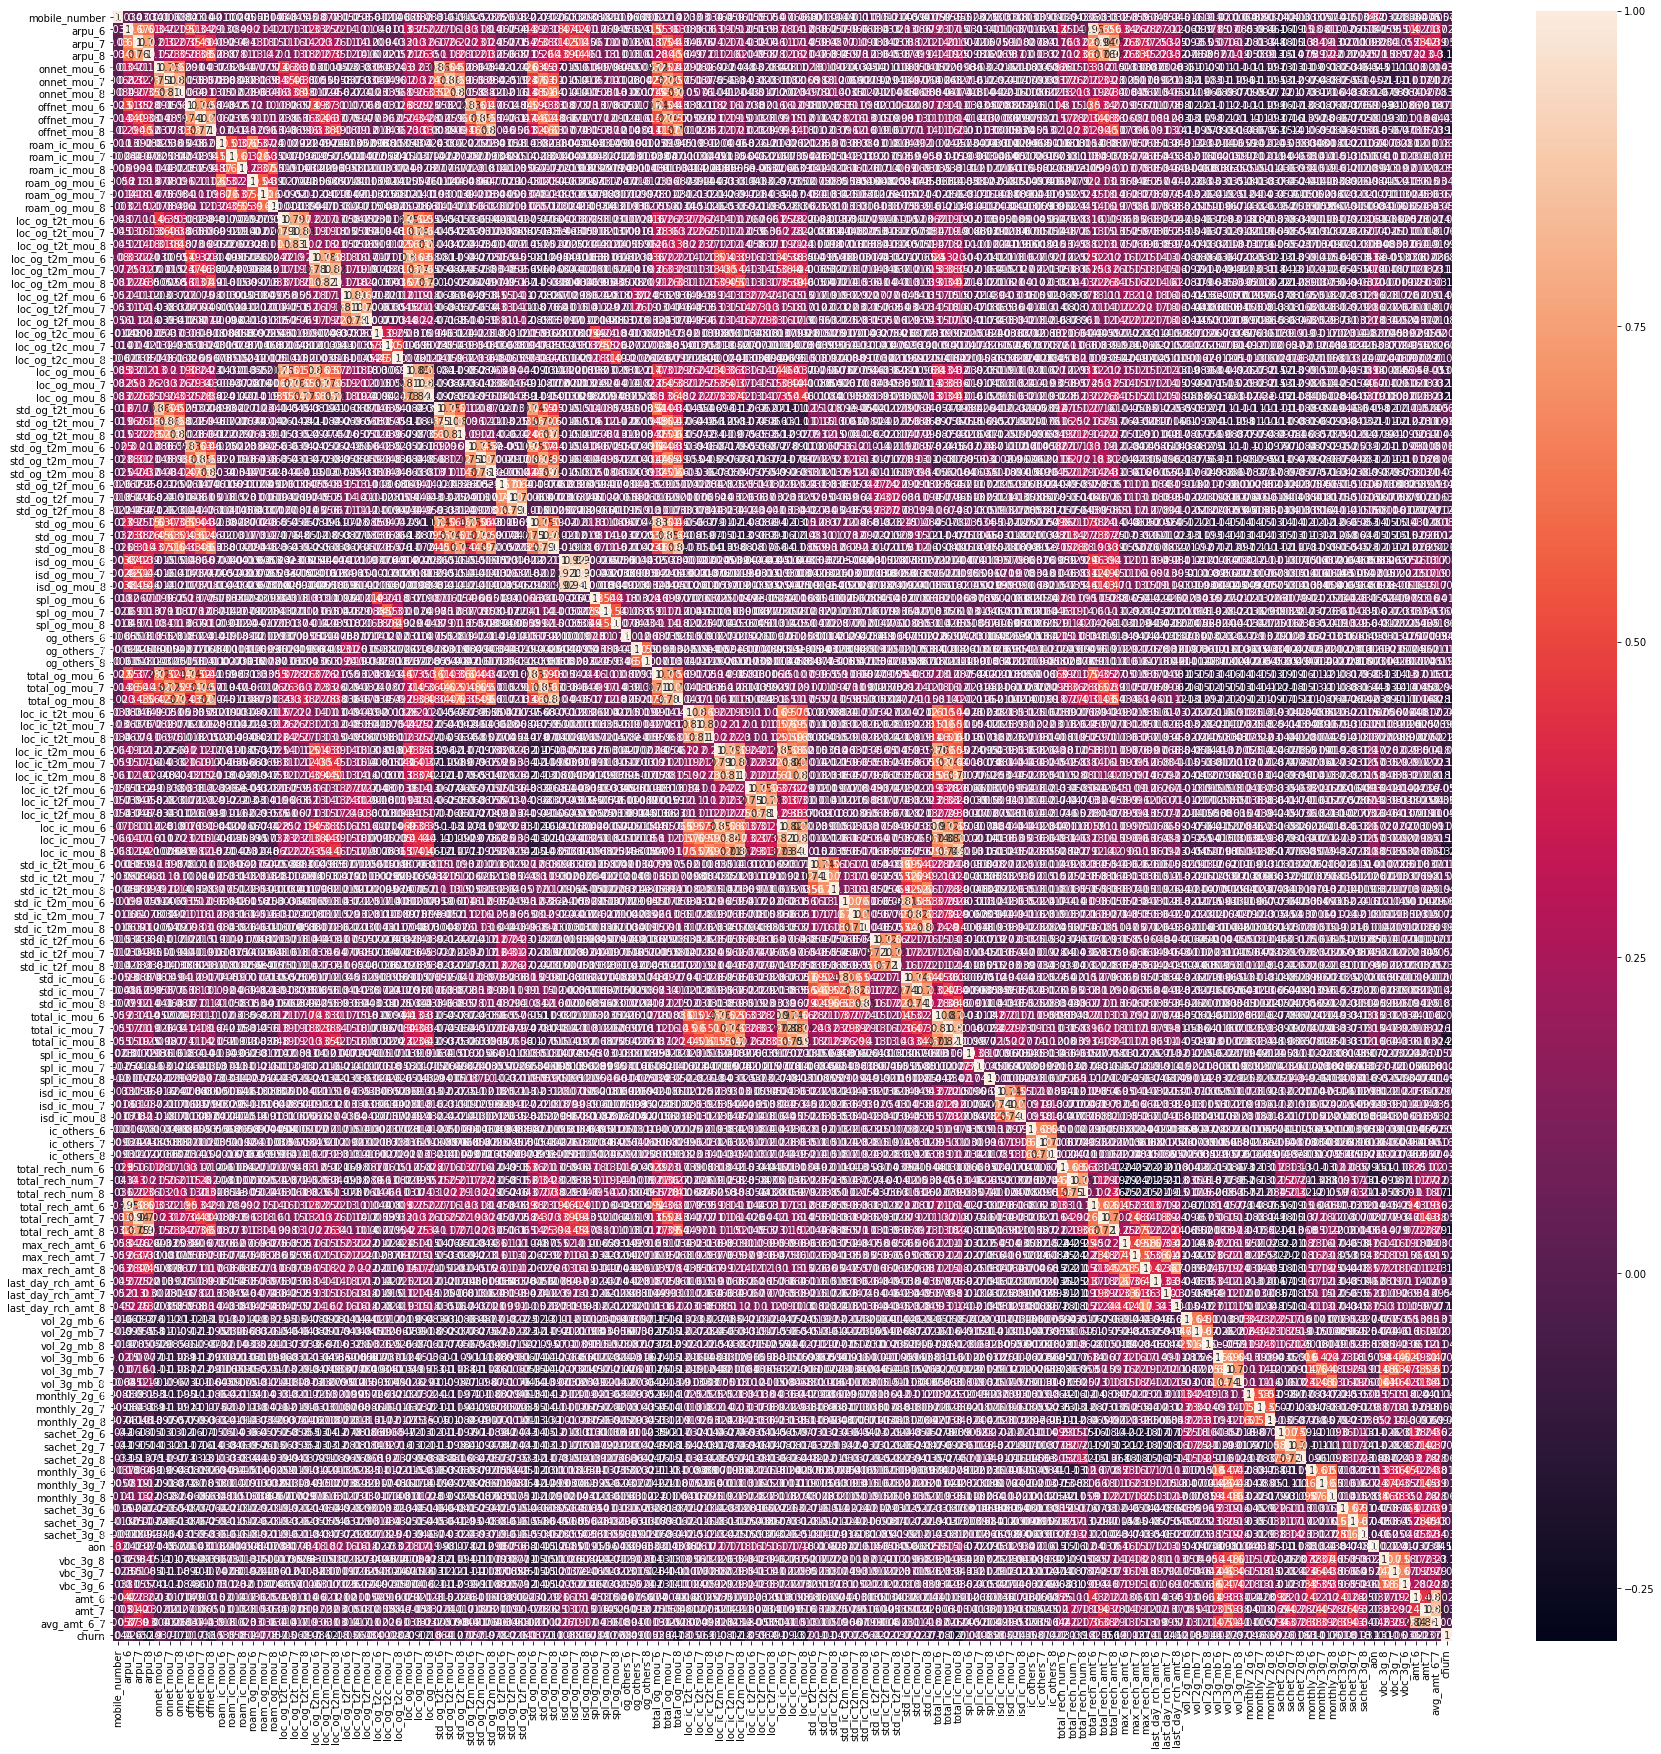

In [61]:
# Plotting correlations on heatmap
corr = df1.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

This heatmap is too cluttered to find meaningful insights from it.

In [92]:
# Rechecking df
df1.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  sachet_3g_7  \
0          0.00          0.00          0.00          0.00  ...            0   
7         52.29        453.43        567.16        325.91  ...            0   
8         35.08         94.66         80.63        136.48  ...            0   
21        85.14        757.93        896.68        983.39  ...            0   
23        33.58         85.41         89.36        205.89  ...            0   

    sachet_3g_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6   amt_6   amt_7  \
0             0  968     30.40      0.00    101.20   614.0   504.0   
7             0  802     57.74     19.38     18.74  1580.0   790.0   
8             0  315     21.03    910.65    122.16   437.0   955.0   
21            0  720      0.00      0.00      0.00   600.0   680.0   
23            1  604     40.45     51.86      0.00     0.0  1166.0   

    avg_amt_6_7  churn  
0         559.0      1  
7        1185.0      1  
8         696.0      0  
21        640.0      0  
23        583.0      0  

[5 rows x 132 columns]

In [93]:
# Let's check other recharge related variables:
ls_date = df1.columns[df1.columns.str.contains('date',regex=True)]

In [94]:
# lets check the % of NA values for recharge related variables
100*df1.loc[:,ls_date].isnull().sum()/len(df1)

date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
dtype: float64

In [95]:
# We will drop these columns since they are not going to be of too much use. 
df1=df1.drop(['date_of_last_rech_6'],axis=1)
df1=df1.drop(['date_of_last_rech_7'],axis=1)
df1=df1.drop(['date_of_last_rech_8'],axis=1)

In [96]:
# Outliers will be removed. 
from scipy import stats
df1[(np.abs(stats.zscore(df1))< 3).all(axis=1)]

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         7000842753   197.385   214.816   213.803         0.00         0.00   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
21        7002124215   514.453   597.753   637.760       102.41       132.11   
23        7000887461    74.350   193.897   366.966        48.96        50.66   
38        7000815202   363.987   486.558   393.909       248.99       619.96   
91        7000160837     4.000   149.121   123.761         0.00         0.00   
92        7001606600   465.794   530.596   463.903       178.46        92.96   
96        7001480390   676.999   786.560   377.488       113.24       360.04   
101       7001746121   512.524   402.001  1144.254       314.66       197.01   
104       7002144559   143.313    80.257   118.036         4.35         0.00   
111       7001300706   596.301   146.073     0.000        55.19         3.26   
134       7000594971   740.191   496.027   480.940       442.79       128.48   
147       7000958601   322.570   303.773   380.262         4.16        27.58   
158       7001280759   558.849   887.428  1121.204       227.91       254.34   
171       7000661238   329.840   384.343   416.213        88.29       213.73   
172       7000038517   129.815    66.237    66.249        25.39         0.00   
184       7002346847  1047.488   877.192   918.314       109.79        83.78   
185       7001104356   340.265   479.993   310.567        30.78        76.66   
188       7000340381   734.641   183.668     0.000         4.38         0.98   
199       7002311591   318.783   636.546   609.463       288.56       376.66   
206       7000186194   472.685   224.860   208.491         7.88         4.83   
224       7002238266   264.598   288.207   452.026        25.96        14.21   
225       7001229326   715.999   456.730   423.125        85.59        53.28   
242       7001656501    44.560   152.157   240.953        20.11        21.74   
244       7002162154   526.560   608.759   473.101       192.64       156.09   
252       7001205540   386.027   584.512   543.651       118.91       351.68   
253       7000640944   598.549   622.128   703.830       437.94       347.88   
256       7000854899   546.663   133.000   214.276         6.71         2.83   
274       7002396189   367.158   377.947   533.731        39.44        52.68   
281       7001350301   522.896   490.800   258.642       239.61       153.73   
283       7001873090   399.550   333.544     6.533        87.23         5.81   
293       7000934365   170.604   516.314   552.369        19.83        91.71   
294       7000050371   453.855   384.946   398.673       228.34       164.74   
310       7001313501   498.282   376.880   326.850       273.38       192.18   
319       7002249167   746.508   230.866   445.501        69.06        35.44   
321       7001980710   761.644   894.920   762.914       375.64       213.18   
329       7000284546    63.694   302.705   290.301         1.68        10.94   
337       7000166926   507.136   375.783   268.960        53.01        52.64   
339       7000465250   567.074   328.154     2.800        62.21        60.48   
345       7002367203   328.523   296.655    18.400       143.86       119.69   
358       7002255278   688.670   205.780   707.910        68.34        38.93   
360       7002368958   402.726   434.068   546.803       552.78       681.78   
365       7002089749   349.682   285.803   481.114       146.94        61.76   
370       7000353418   642.593   857.680   343.272        23.34         5.09   
379       7001887712   288.844   552.754   412.260       480.48      1095.81   
384       7001760689   518.663   373.891   513.787        51.59        22.31   
385       7000310042   627.866   488.910   176.202       229.56       267.39   
387       7001322999   336.083   621.581   179.997        38.73        98.89   
389       7000800545   406.201   160.469   326.668         1.09         0.00   
407    

In [97]:
# Resetting index
df1 = df1.reset_index(drop=True)
df1.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
1     7000701601  1069.180  1349.850  3171.480        57.84        54.68   
2     7001524846   378.721   492.223   137.362       413.69       351.03   
3     7002124215   514.453   597.753   637.760       102.41       132.11   
4     7000887461    74.350   193.897   366.966        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  sachet_3g_7  \
0         0.00          0.00          0.00          0.00  ...            0   
1        52.29        453.43        567.16        325.91  ...            0   
2        35.08         94.66         80.63        136.48  ...            0   
3        85.14        757.93        896.68        983.39  ...            0   
4        33.58         85.41         89.36        205.89  ...            0   

   sachet_3g_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6   amt_6   amt_7  \
0            0  968     30.40      0.00    101.20   614.0   504.0   
1            0  802     57.74     19.38     18.74  1580.0   790.0   
2            0  315     21.03    910.65    122.16   437.0   955.0   
3            0  720      0.00      0.00      0.00   600.0   680.0   
4            1  604     40.45     51.86      0.00     0.0  1166.0   

   avg_amt_6_7  churn  
0        559.0      1  
1       1185.0      1  
2        696.0      0  
3        640.0      0  
4        583.0      0  

[5 rows x 129 columns]

In [98]:
X = df1.drop(['churn'], axis=1)
y = df1['churn']

df1.drop('churn', axis=1, inplace=True)

In [99]:
# Standardizing features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [100]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [102]:
# Balancing DataSet by suing SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

## MODEL BUILDING:

### SVM:

#### Building linear model:

In [103]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_tr,y_tr)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8182273410115173

#### Building non linear model:

In [104]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_tr, y_tr)

# predict
y_pred = non_linear_model.predict(X_test)

In [105]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8679686195960608 

[[4641  661]
 [ 130  559]]


#### Using the folds technique to find the best value of Gamma and C:

In [74]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma':[1e-2, 1e-3, 1e-4],
                     'C':[1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_tr, y_tr)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 68.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 117.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      210.669624      1.105486        25.334273        0.174903       1   
1      183.632102      1.267206        27.550948        1.058916       1   
2      225.252639      0.673089        34.973107        0.940051       1   
3      284.857301      3.162307        18.235450        0.568445      10   
4      162.540684      3.369764        24.919583        0.590135      10   
5      187.607275      1.137023        28.996683        0.182252      10   
6      544.934110     38.542285        13.388608        0.500549     100   
7      250.463244      5.752341        20.680714        1.015660     100   
8      180.304796      3.528700        27.178344        0.272623     100   
9      742.543383     21.375109        10.986430        0.145972    1000   
10     902.495786      6.316696        17.737183        0.439033    1000   
11     305.091808      8.239316        21.610228        4.329095    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.894300   
1        0.001      {'C': 1, 'gamma': 0.001}           0.843190   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.824191   
3         0.01      {'C': 10, 'gamma': 0.01}           0.932834   
4        0.001     {'C': 10, 'gamma': 0.001}           0.862189   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.833690   
6         0.01     {'C': 100, 'gamma': 0.01}           0.951432   
7        0.001    {'C': 100, 'gamma': 0.001}           0.889885   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.843190   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.952770   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.916912   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.861119   

    split1_test_score  split2_test_score       ...         mean_test_score  \
0            0.889751           0.896173       ...                0.893706   
1            0.843324           0.845598       ...                0.844680   
2            0.821247           0.830211       ...                0.825974   
3            0.927750           0.932700       ...                0.931358   
4            0.860851           0.865534       ...                0.862877   
5            0.836098           0.839577       ...                0.837535   
6            0.947819           0.951833       ...                0.951857   
7            0.887610           0.892159       ...                0.890334   
8            0.842521           0.848675       ...                0.845563   
9            0.949692           0.954375       ...                0.952580   
10           0.910891           0.916511       ...                0.914124   
11           0.857105           0.864062       ...                0.861405   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.002995                5            0.906536            0.907975   
1         0.001572               10            0.847561            0.848799   
2         0.003475               12            0.827056            0.828661   
3         0.002818                3            0.955175            0.954941   
4         0.001810                7            0.870242            0.870108   
5         0.002620               11            0.840001            0.840403   
6         0.002306                2            0.986586            0.987054   
7         0.001700                6            0.904797            0.906068   
8         0.002398                9            0.849267            0.850204   
9         0.001659                1            0.998294            0.998428   
10        0.002783                4            0.941828            0.942129   
11        0.002391                8            0.869138            0.869372   

    split2_train_score  split3_train_score  split4_train_score  \
0             0.905533            

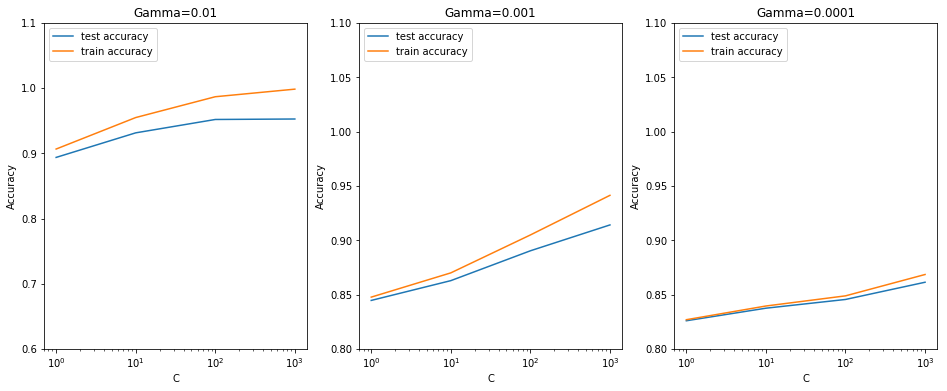

In [77]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [78]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9525797473774352 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [79]:
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.8756468035386413 

[[4947  355]
 [ 390  299]] 



#### Applying SMOTE to take care of class imbalance of data:

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)

#Applying Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(42716, 128)
(42716,)


### PCA:

In [107]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(42716, 128)
(5991, 128)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[4290 1050]
 [ 136  515]]


In [111]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8020363879152062


In [114]:
col = list(df1.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca

PC1       PC2       PC3             Feature
0    0.022772 -0.035291 -0.005321       mobile_number
1    0.175231  0.014016  0.127263              arpu_6
2    0.190812 -0.008825  0.144007              arpu_7
3    0.164201 -0.060549  0.136588              arpu_8
4    0.139857  0.150822 -0.035455         onnet_mou_6
5    0.145313  0.126434 -0.022328         onnet_mou_7
6    0.122128  0.060136 -0.000672         onnet_mou_8
7    0.181892  0.089114 -0.012676        offnet_mou_6
8    0.191991  0.077078  0.005663        offnet_mou_7
9    0.156994  0.006531  0.021902        offnet_mou_8
10   0.022855 -0.001385  0.199551       roam_ic_mou_6
11   0.016354  0.002784  0.257599       roam_ic_mou_7
12   0.030162  0.009098  0.214685       roam_ic_mou_8
13   0.030598  0.022510  0.206122       roam_og_mou_6
14   0.033373  0.028659  0.261500       roam_og_mou_7
15   0.044740  0.024209  0.225820       roam_og_mou_8
16   0.083112 -0.060847 -0.064473    loc_og_t2t_mou_6
17   0.086889 -0.060165 -0.060114    loc_og_t2t_mou_7
18   0.080224 -0.062989 -0.046569    loc_og_t2t_mou_8
19   0.118295 -0.118067 -0.081139    loc_og_t2m_mou_6
20   0.129236 -0.123478 -0.074043    loc_og_t2m_mou_7
21   0.117788 -0.125853 -0.047395    loc_og_t2m_mou_8
22   0.049023 -0.083851  0.014087    loc_og_t2f_mou_6
23   0.050972 -0.086682  0.011562    loc_og_t2f_mou_7
24   0.045849 -0.081788  0.004814    loc_og_t2f_mou_8
25   0.021906  0.017291 -0.016419    loc_og_t2c_mou_6
26   0.028221  0.025369 -0.006839    loc_og_t2c_mou_7
27   0.028380  0.010146 -0.007689    loc_og_t2c_mou_8
28   0.131331 -0.119750 -0.091806        loc_og_mou_6
29   0.141815 -0.123072 -0.085488        loc_og_mou_7
30   0.128406 -0.124735 -0.059362        loc_og_mou_8
31   0.109077  0.202808 -0.025045    std_og_t2t_mou_6
32   0.112836  0.175158 -0.012256    std_og_t2t_mou_7
33   0.090358  0.102444  0.003151    std_og_t2t_mou_8
34   0.129318  0.180146 -0.008476    std_og_t2m_mou_6
35   0.136629  0.160560  0.004438    std_og_t2m_mou_7
36   0.103514  0.082513  0.011984    std_og_t2m_mou_8
37   0.019853 -0.030071  0.013438    std_og_t2f_mou_6
38   0.022555 -0.030995  0.018083    std_og_t2f_mou_7
39   0.021417 -0.032966  0.014924    std_og_t2f_mou_8
40   0.159669  0.255037 -0.022050        std_og_mou_6
41   0.167343  0.223507 -0.004695        std_og_mou_7
42   0.128916  0.121729  0.010374        std_og_mou_8
43   0.028528 -0.016195  0.057844        isd_og_mou_6
44   0.034615 -0.021312  0.066283        isd_og_mou_7
45   0.029474 -0.017482  0.053112        isd_og_mou_8
46   0.036547  0.031876 -0.027770        spl_og_mou_6
47   0.048194  0.030695 -0.024210        spl_og_mou_7
48   0.044483  0.008992 -0.019588        spl_og_mou_8
49   0.018924  0.017260 -0.027400         og_others_6
50   0.017318 -0.020905  0.022527         og_others_7
51   0.014848 -0.018234  0.015879         og_others_8
52   0.215515  0.158910 -0.066733      total_og_mou_6
53   0.227245  0.134463 -0.045379      total_og_mou_7
54   0.181958  0.040165 -0.018885      total_og_mou_8
55   0.062114 -0.098414 -0.090512    loc_ic_t2t_mou_6
56   0.065997 -0.100011 -0.086264    loc_ic_t2t_mou_7
57   0.062721 -0.099597 -0.068821    loc_ic_t2t_mou_8
58   0.096880 -0.156590 -0.123335    loc_ic_t2m_mou_6
59   0.109087 -0.161119 -0.115473    loc_ic_t2m_mou_7
60   0.094876 -0.152838 -0.083294    loc_ic_t2m_mou_8
61   0.037733 -0.092449 -0.041080    loc_ic_t2f_mou_6
62   0.038067 -0.091691 -0.039835    loc_ic_t2f_mou_7
63   0.038941 -0.090685 -0.034120    loc_ic_t2f_mou_8
64   0.105247 -0.173656 -0.138925        loc_ic_mou_6
65   0.116233 -0.178536 -0.131657        loc_ic_mou_7
66   0.103929 -0.170604 -0.098323        loc_ic_mou_8
67   0.051734  0.004701 -0.002350    std_ic_t2t_mou_6
68   0.050561 -0.001047 -0.002311    std_ic_t2t_mou_7
69   0.043081 -0.010447  0.003358    std_ic_t2t_mou_8
70   0.050498 -0.011160 -0.002870    std_ic_t2m_mou_6
71   0.055188 -0.015948  0.000610    std_ic_t2m_mou_7
72   0.050634 -0.023084  0.003025    std_ic_t2m_mou_8
73   0.018299 

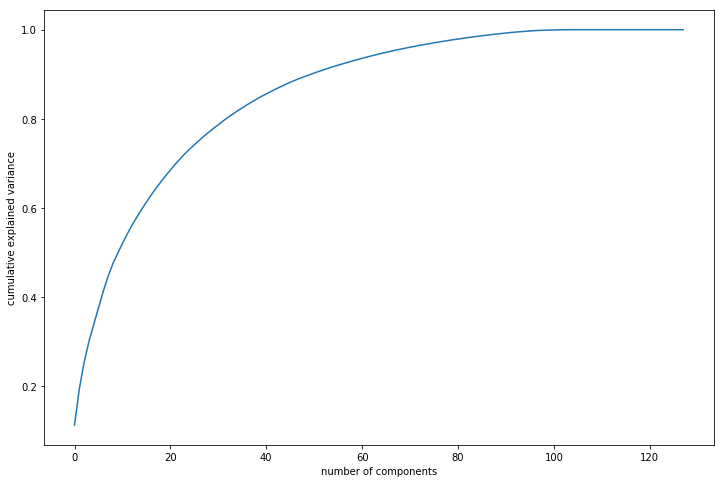

In [113]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [115]:
# Checking pca.explained_variance_ratio
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.32,  19.42,  25.34,  30.  ,  33.85,  37.6 ,  41.32,  44.64,
        47.5 ,  49.81,  52.05,  54.14,  56.14,  57.95,  59.7 ,  61.32,
        62.9 ,  64.41,  65.84,  67.2 ,  68.5 ,  69.77,  70.98,  72.15,
        73.18,  74.18,  75.15,  76.1 ,  76.99,  77.85,  78.69,  79.51,
        80.31,  81.05,  81.78,  82.46,  83.13,  83.78,  84.42,  85.02,
        85.58,  86.13,  86.67,  87.2 ,  87.7 ,  88.19,  88.63,  89.06,
        89.47,  89.87,  90.26,  90.64,  91.01,  91.37,  91.72,  92.04,
        92.36,  92.67,  92.98,  93.28,  93.58,  93.87,  94.15,  94.42,
        94.68,  94.93,  95.17,  95.41,  95.64,  95.86,  96.08,  96.29,
        96.49,  96.69,  96.88,  97.06,  97.24,  97.42,  97.59,  97.75,
        97.91,  98.07,  98.23,  98.38,  98.52,  98.66,  98.79,  98.92,
        99.04,  99.16,  99.28,  99.39,  99.49,  99.57,  99.65,  99.73,
        99.81,  99.87,  99.91,  99.94,  99.97,  99.99, 100.01, 100.02,
       100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02, 100.02,
      

In [116]:
pca_40 = PCA(n_components=40)

df_tr_pca_40 = pca_40.fit_transform(X_tr)
print(df_tr_pca_40.shape)

df_test_pca_40 = pca_40.transform(X_test)
print(df_test_pca_40.shape)

(42716, 40)
(5991, 40)


In [117]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_40, y_tr)

# Predicted probabilities
y_pred40 = lr_pca1.predict(df_test_pca_40)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred40)

In [118]:
print(confusion_matrix(y_test,y_pred40))

[[4257 1083]
 [ 142  509]]


In [119]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred40))

Logistic Regression accuracy with PCA:  0.7955266232682356


### DECISION TREE:

In [93]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [94]:
# Splitting the data into train and test
X_tr, X_test, y_tr, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

In [95]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7970
           1       0.74      0.42      0.53      1016

    accuracy                           0.92      8986
   macro avg       0.83      0.70      0.74      8986
weighted avg       0.91      0.92      0.91      8986



In [97]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7819  151]
 [ 593  423]]
0.9172045403961718


In [98]:
# Hyperparameter tuning:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True)
tree.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.151795      0.006597         0.002393        0.000488   
1       0.346077      0.058851         0.002802        0.000389   
2       0.401128      0.003752         0.002399        0.000484   
3       0.523208      0.008234         0.002791        0.000385   
4       0.636492      0.002916         0.002811        0.000737   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.917024           0.912017   
1               2  {'max_depth': 2}           0.922031           0.920601   
2               3  {'max_depth': 3}           0.922270           0.919886   
3               4  {'max_depth': 4}           0.921793           0.918455   
4               5  {'max_depth': 5}           0.922270           0.919647   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.917501           0.918674       ...                0.918586   
1           0.922747           0.922490       ...                0.923833   
2           0.924893           0.923444       ...                0.924500   
3           0.924654           0.922251       ...                0.923690   
4           0.915355           0.923444       ...                0.922163   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005102                6            0.920766            0.919633   
1        0.003805                2            0.925774            0.925654   
2        0.004098                1            0.926191            0.925893   
3        0.004286                3            0.926727            0.927085   
4        0.004845                4            0.929589            0.929470   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.919096            0.920353            0.918092   
1            0.925118            0.925659            0.923398   
2            0.926012            0.925897            0.923756   
3            0.926549            0.926553            0.924352   
4            0.929768            0.929891            0.926379   

   mean_train_score  std_train_score  
0          0.919588         0.000944  
1          0.925120         0.000891  
2          0.925550         0.000904  
3          0.926253         0.000971  
4          0.929019         0.001328  

[5 rows x 21 columns]

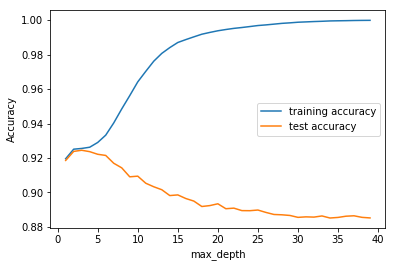

In [100]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### MAX DEPTH:
You can see that as we increase the value of max_depth, both training and test score increase till about max-depth = 4, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds. 

In [101]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True)
tree.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.311633      0.124968         0.009310        0.012624   
1       2.035957      0.124844         0.002993        0.000001   
2       1.650389      0.129600         0.002804        0.000392   
3       1.544672      0.224571         0.003989        0.002090   
4       1.332439      0.086531         0.002599        0.000482   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.898903   
1                     25  {'min_samples_leaf': 25}           0.916547   
2                     45  {'min_samples_leaf': 45}           0.915832   
3                     65  {'min_samples_leaf': 65}           0.917024   
4                     85  {'min_samples_leaf': 85}           0.918216   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.900334           0.892942           0.899595       ...          
1           0.914878           0.915594           0.912712       ...          
2           0.920362           0.920124           0.918435       ...          
3           0.922031           0.918693           0.920582       ...          
4           0.919886           0.919170           0.923444       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.898841        0.003178               10            0.966375   
1         0.916202        0.002835                9            0.937459   
2         0.920637        0.004221                8            0.932689   
3         0.921353        0.003925                7            0.929470   
4         0.921830        0.003745                6            0.928933   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.967030            0.965778            0.968523   
1            0.937101            0.936505            0.937463   
2            0.932451            0.932272            0.931084   
3            0.930364            0.928576            0.929355   
4            0.927741            0.927443            0.927924   

   split4_train_score  mean_train_score  std_train_score  
0            0.965604          0.966662         0.001057  
1            0.936811          0.937068         0.000372  
2            0.931565          0.932012         0.000597  
3            0.928227          0.929198         0.000747  
4            0.928703          0.928149         0.000572  

[5 rows x 21 columns]

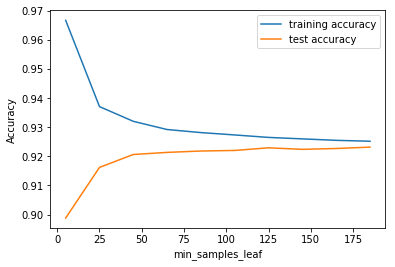

In [103]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### min_samples_leaf:
We can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 75, however, the model becomes more stable and the training and test accuracy start to converge.

In [104]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True)
tree.fit(X_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [105]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.768805      0.256233         0.010399        0.014795   
1       2.670661      0.185275         0.002999        0.000013   
2       2.642337      0.202583         0.003003        0.000014   
3       2.627583      0.220331         0.002990        0.000003   
4       2.584691      0.217777         0.002803        0.000404   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.889127   
1                      25  {'min_samples_split': 25}           0.903910   
2                      45  {'min_samples_split': 45}           0.903433   
3                      65  {'min_samples_split': 65}           0.906056   
4                      85  {'min_samples_split': 85}           0.909156   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.884359           0.878636           0.888385       ...          
1           0.893181           0.894850           0.901264       ...          
2           0.904149           0.897234           0.908419       ...          
3           0.907010           0.900095           0.909850       ...          
4           0.907487           0.904626           0.910088       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.885916        0.004045               10            0.993621   
1         0.898364        0.003961                9            0.966076   
2         0.904994        0.004910                8            0.955106   
3         0.907235        0.004346                7            0.948846   
4         0.909477        0.003766                6            0.944315   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.992786            0.992071            0.993502   
1            0.964347            0.963215            0.962740   
2            0.953199            0.952781            0.950042   
3            0.948012            0.946581            0.946524   
4            0.944196            0.943600            0.942709   

   split4_train_score  mean_train_score  std_train_score  
0            0.992787          0.992953         0.000562  
1            0.961192          0.963514         0.001633  
2            0.952191          0.952664         0.001635  
3            0.948733          0.947739         0.001011  
4            0.944382          0.943840         0.000630  

[5 rows x 21 columns]

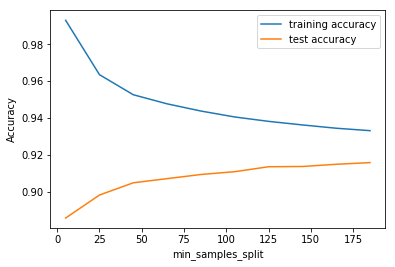

In [106]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

#### Grid Search to Find Optimal Hyperparameters


In [107]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, return_train_score = True)

# Fit the grid search to the data
grid_search.fit(X_tr,y_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [108]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.216947      0.078445         0.003192    3.992319e-04   
1        1.078114      0.137937         0.003392    4.887139e-04   
2        0.993743      0.039470         0.003198    3.959167e-04   
3        0.998531      0.029922         0.002793    3.989220e-04   
4        1.661957      0.081683         0.002992    6.310526e-04   
5        1.631838      0.065151         0.003391    4.887335e-04   
6        1.582370      0.047562         0.002793    7.459580e-04   
7        1.601519      0.051164         0.003192    3.988505e-04   
8        0.735833      0.013401         0.002593    4.885777e-04   
9        0.702721      0.009110         0.003192    7.464166e-04   
10       0.691153      0.019503         0.002992    1.784161e-07   
11       0.712495      0.042775         0.003192    3.988982e-04   
12       1.247465      0.027067         0.002993    2.780415e-07   
13       1.253050      0.017026         0.002794    3.984936e-04   
14       1.610492      0.144477         0.004591    2.725439e-03   
15       1.233901      0.103453         0.002992    2.861023e-07   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score       ...         mean_test_score  std_test_score  \
0            0.919409       ...                0.923880        0.003961   
1            0.919409       ...                0.923880        0.003961   
2            0.920839       ...                0.923833        0.003135   
3            0.920839       ...                0.923833        0.003135   
4            0.918693       ...                0.920160 

In [109]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9238803834597225
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


**Running the model with best parameters obtained from grid search:**

In [110]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [111]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9177609614956599

In [112]:
# tree with max_depth = 4
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_tr, y_tr)

# score
print(clf_gini.score(X_test,y_test))

0.9185399510349432


In [120]:
from io import StringIO
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


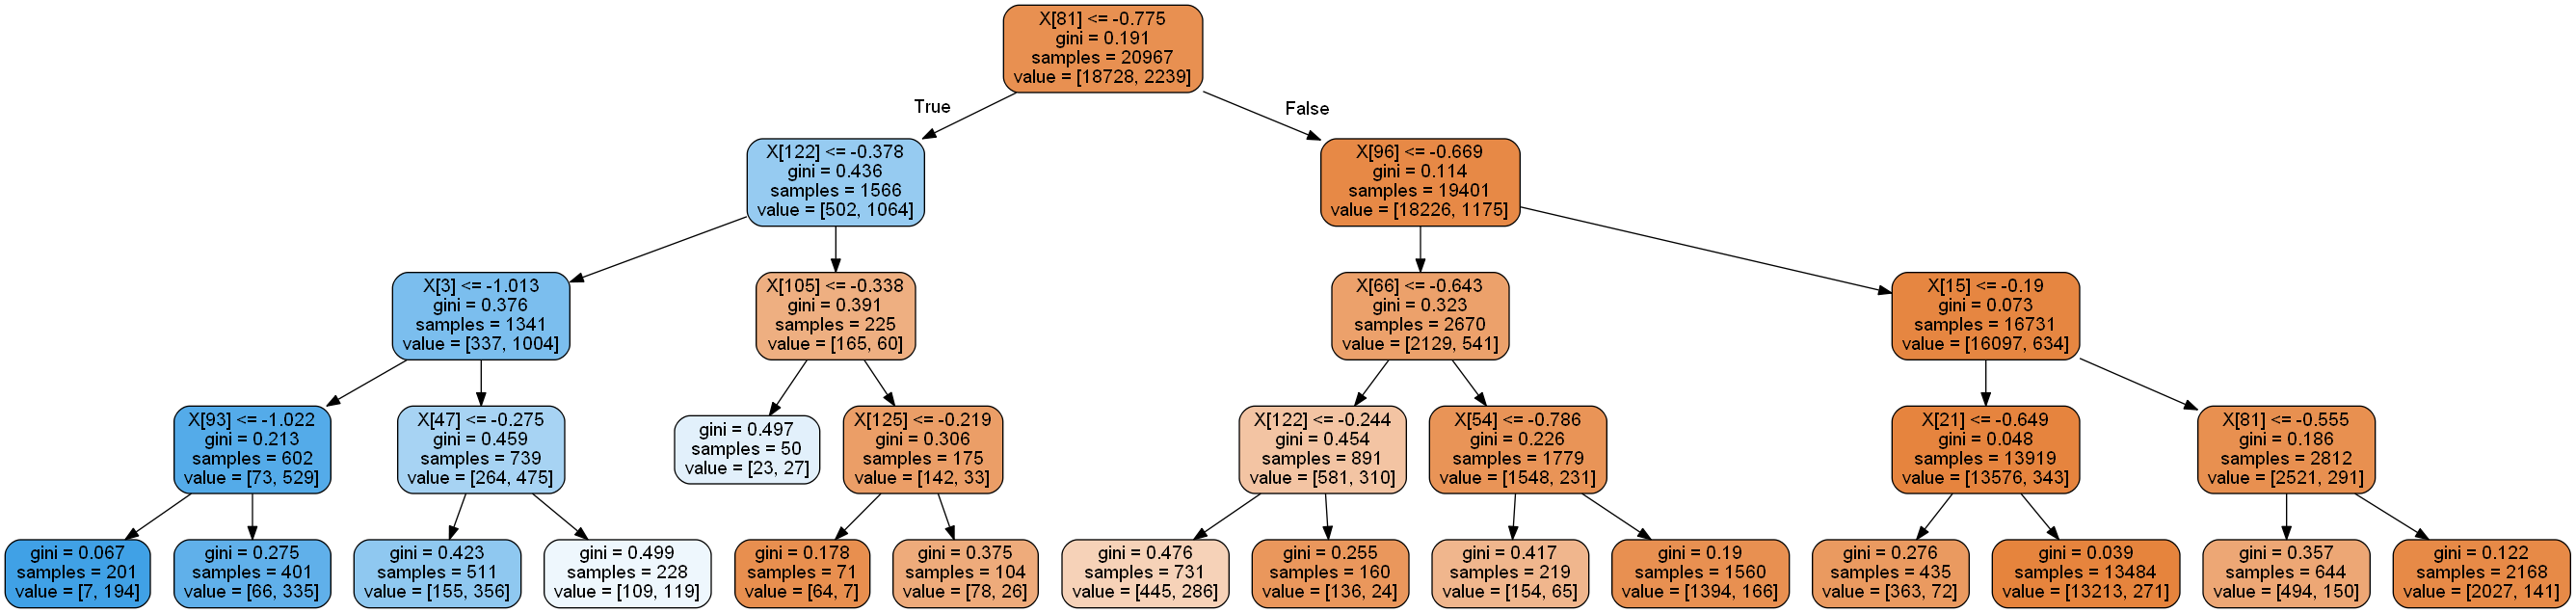

In [121]:
# plotting tree with max_depth=3
dot_data = StringIO()  
tree.export_graphviz(clf_gini, out_file=dot_data,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [122]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7970
           1       0.74      0.43      0.54      1016

    accuracy                           0.92      8986
   macro avg       0.84      0.71      0.75      8986
weighted avg       0.91      0.92      0.91      8986



In [123]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7818  152]
 [ 580  436]]


### RANDOM FOREST:

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_tr,y_tr)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

In [ ]:
print(accuracy_score(y_test,predictions))

#### Tuning max_depth:

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True)
rf.fit(X_tr, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators:

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy" , return_train_score = True)
rf.fit(X_tr, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features:

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy" , return_train_score = True)
rf.fit(X_tr, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf:

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy" , return_train_score = True)
rf.fit(X_tr, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split:

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy" , return_train_score = True)
rf.fit(X_tr, y_tr)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters:

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_tr, y_tr)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

**Fitting the final model with the best parameters obtained from grid search.**

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# fit
rfc.fit(X_tr,y_tr)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

## CONCLUSION:

- Random Forest is the best method to Predict Churn with accuracy of 92%, followed by SVM with accuracy of 88%, PCA with        accuracy of 80%. 
- Features which are a strong indicators of Churn Behaviour are:
  - ARPU (Average revenue per user)
  - ONNET_MOU (All kind of calls within the same operator network - Minutes of usage - voice calls)
  - OFFNET_MOU (All kind of calls outside the operator T network - Minutes of usage - voice calls)
  - ROAM_IC_MOU (Indicates that customer is in roaming zone during the call - Incoming calls - Minutes of usage)